# Librerías

In [1]:
!pip install optuna

In [2]:
import sys
import os
sys.path.append(".")
import re
import pandas as pd
import numpy as np
import pandasql as ps
from datetime import timedelta
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
def thousands_formatter_func(x, pos):
    return f'{int(x / 1e3)}K'
thousand_formatter = FuncFormatter(thousands_formatter_func)
def decimal_percentage_formatter_func(x, pos):
    return f'{int(x * 100)}%'
decimal_percentage_formatter = FuncFormatter(decimal_percentage_formatter_func)
def percentage_formatter_func(x, pos):
    return f'{int(x)}%'
percentage_formatter = FuncFormatter(percentage_formatter_func)


Bad key text.latex.unicode in file /home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When 

# Lectura archivos

In [3]:
df_bombs = pd.read_csv('data/processed_csv/df_bombs.csv', delimiter=',', encoding='latin-1', index_col=0)
df_of = pd.read_csv('data/processed_csv/df_of.csv', delimiter=',', encoding='latin-1')
df_operators = pd.read_csv('data/processed_csv/df_operators.csv', delimiter=',', encoding='latin-1')
df_operators_participation = pd.read_csv('data/processed_csv/df_operators_participation.csv', delimiter=',', encoding='latin-1')

df_bombs['start_date'] = pd.to_datetime(df_bombs['start_date'], format='%Y-%m-%d %H:%M:%S.%f')
df_bombs['end_date'] = pd.to_datetime(df_bombs['end_date'], format='%Y-%m-%d %H:%M:%S.%f')
df_of['start_date'] = pd.to_datetime(df_of['start_date'], format='%Y-%m-%d %H:%M:%S.%f')
df_of['end_date'] = pd.to_datetime(df_of['end_date'], format='%Y-%m-%d %H:%M:%S.%f')



In [4]:
df_of.line = df_of.line.replace({"LÃ\x8dNEA 2": "LINEA_2", "LINEA_4": "LINEA_4", "LÃ\x8dNEA 1": "LINEA_1", "LINEA_6": "LINEA_6",
                    "LINEA 3": "LINEA_3", "LÃ\x8dNEA KIVU": "LINEA_KIVU", "PREFILTRO L-1": "PREFILTRO_L-1", "PREFILTRO L-6": "PREFILTRO_L-6",
                        "LINEA 7": "LINEA_7", "LINEA 8 IML": "LINEA_8_IML"})
df_operators_participation.line = df_operators_participation.line.replace({"LÃ\x8dNEA 2": "LINEA_2", "LINEA_4": "LINEA_4", "LÃ\x8dNEA 1": "LINEA_1", "LINEA_6": "LINEA_6",
                    "LINEA 3": "LINEA_3", "LÃ\x8dNEA KIVU": "LINEA_KIVU", "PREFILTRO L-1": "PREFILTRO_L-1", "PREFILTRO L-6": "PREFILTRO_L-6",
                        "LINEA 7": "LINEA_7", "LINEA 8 IML": "LINEA_8_IML"})

df_of.line.unique()

array(['LINEA_2', 'LINEA 4', 'LINEA 6', 'LINEA_1', 'LINEA_3',
       'LINEA_KIVU', 'PREFILTRO_L-1', 'PREFILTRO_L-6', 'LINEA_7',
       'LINEA_8_IML'], dtype=object)

In [5]:
def remove_special_chars(text):
    # Agrega los caracteres especiales que deseas eliminar, incluyendo los tildes
    special_chars = r"[^\w\sáéíóúÁÉÍÓÚñÑÃ]"
    text_without_special_chars = re.sub(special_chars, '', text)
    # Agrega aquí cualquier otro reemplazo adicional que desees realizar
    return text_without_special_chars

In [6]:
df_of['line'].apply(remove_special_chars)

0       LINEA_2
1       LINEA 4
2       LINEA 6
3       LINEA_1
4       LINEA 6
         ...   
5090    LINEA_2
5091    LINEA_2
5092    LINEA_2
5093    LINEA_7
5094    LINEA_7
Name: line, Length: 5095, dtype: object

In [7]:
df_of["weekday"] = df_of["start_date"].dt.weekday.astype("category")
df_of["turn"] = df_of["start_date"].apply(lambda x: 'AM' if x.hour < 14 else 'PM')
df_of["month"] = df_of["start_date"].dt.month.astype("category")
df_of["year"] = df_of["start_date"].dt.year.astype("category")


In [8]:
df_of.head()

order   bomb_type     line  plan_qty  total_good_qty  total_bad_qty  \
0   274185     HPS050M  LINEA_2       1.0             0.0            0.0   
1  5029646       25461  LINEA 4       1.0            17.0            0.0   
2  5070828       11509  LINEA 6      12.0             0.0            0.0   
3  5157110  01226-0890  LINEA_1       2.0             2.0            0.0   
4  5158184    11509INT  LINEA 6      12.0            12.0            0.0   

   good_qty  bad_qty              start_date                end_date  \
0       0.0      0.0 2020-02-28 07:47:47.760 2021-02-18 08:44:11.897   
1       0.0      0.0 2020-05-26 10:42:49.543 2021-04-07 05:41:01.177   
2       0.0      0.0 2020-04-17 05:47:54.977 2022-08-10 06:10:35.247   
3       2.0      0.0 2020-01-27 12:04:52.480 2020-01-28 07:26:01.683   
4      12.0      0.0 2020-01-18 11:48:44.873 2020-01-18 12:46:26.833   

   theorical_diff  theorical_time  time_diff_seconds_calculated  \
0           13189           13.35                     13189.211   
1             120            8.80                       118.318   
2           32671           17.40                     32671.480   
3           12623           85.58                     12622.856   
4            3462           19.50                      3461.960   

   time_diff_minutes_calculated  total_operators_minutes  \
0                    219.820183               590.426267   
1                      1.971967                 3.112383   
2                    544.524667               594.821567   
3                    210.380933               210.380933   
4                     57.699333               230.797333   

                              operators_distinct_ids  registers_qty  \
0  ['9105', '918', '8177', '8164', '8230', '9104'...             10   
1           ['9120', '8866', '5020', '8860', '8822']              4   
2                           ['9436', '9142', '5033']              8   
3                                           ['5025']              8   
4                     ['504', '1007', '287', '8945']              2   

   operators_distinct_qty  theorical_qty  theorical_qty_round  performance  \
0                      11      44.226687                 44.0     0.000000   
1                       5       0.353680                  0.0     0.000000   
2                       3      34.185148                 34.0     0.000000   
3                       1       2.458296                  2.0     0.813572   
4                       4      11.835761                 12.0     1.013877   

   performance_round  time_diff_hours_calculated performance_category weekday  \
0                0.0                    3.663670             0% - 10%       4   
1                NaN                    0.032866             0% - 10%       1   
2                0.0                    9.075411             0% - 10%       4   
3                1.0                    3.506349            80% - 90%       0   
4                1.0                    0.961656          100% - 110%       5   

  turn month  year  
0   AM     2  2020  
1   AM     5  2020  
2   AM     4  2020  
3   AM     1  2020  
4   AM     1  2020

# Distribución Performance

In [9]:
df_of.head()

order   bomb_type     line  plan_qty  total_good_qty  total_bad_qty  \
0   274185     HPS050M  LINEA_2       1.0             0.0            0.0   
1  5029646       25461  LINEA 4       1.0            17.0            0.0   
2  5070828       11509  LINEA 6      12.0             0.0            0.0   
3  5157110  01226-0890  LINEA_1       2.0             2.0            0.0   
4  5158184    11509INT  LINEA 6      12.0            12.0            0.0   

   good_qty  bad_qty              start_date                end_date  \
0       0.0      0.0 2020-02-28 07:47:47.760 2021-02-18 08:44:11.897   
1       0.0      0.0 2020-05-26 10:42:49.543 2021-04-07 05:41:01.177   
2       0.0      0.0 2020-04-17 05:47:54.977 2022-08-10 06:10:35.247   
3       2.0      0.0 2020-01-27 12:04:52.480 2020-01-28 07:26:01.683   
4      12.0      0.0 2020-01-18 11:48:44.873 2020-01-18 12:46:26.833   

   theorical_diff  theorical_time  time_diff_seconds_calculated  \
0           13189           13.35                     13189.211   
1             120            8.80                       118.318   
2           32671           17.40                     32671.480   
3           12623           85.58                     12622.856   
4            3462           19.50                      3461.960   

   time_diff_minutes_calculated  total_operators_minutes  \
0                    219.820183               590.426267   
1                      1.971967                 3.112383   
2                    544.524667               594.821567   
3                    210.380933               210.380933   
4                     57.699333               230.797333   

                              operators_distinct_ids  registers_qty  \
0  ['9105', '918', '8177', '8164', '8230', '9104'...             10   
1           ['9120', '8866', '5020', '8860', '8822']              4   
2                           ['9436', '9142', '5033']              8   
3                                           ['5025']              8   
4                     ['504', '1007', '287', '8945']              2   

   operators_distinct_qty  theorical_qty  theorical_qty_round  performance  \
0                      11      44.226687                 44.0     0.000000   
1                       5       0.353680                  0.0     0.000000   
2                       3      34.185148                 34.0     0.000000   
3                       1       2.458296                  2.0     0.813572   
4                       4      11.835761                 12.0     1.013877   

   performance_round  time_diff_hours_calculated performance_category weekday  \
0                0.0                    3.663670             0% - 10%       4   
1                NaN                    0.032866             0% - 10%       1   
2                0.0                    9.075411             0% - 10%       4   
3                1.0                    3.506349            80% - 90%       0   
4                1.0                    0.961656          100% - 110%       5   

  turn month  year  
0   AM     2  2020  
1   AM     5  2020  
2   AM     4  2020  
3   AM     1  2020  
4   AM     1  2020

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


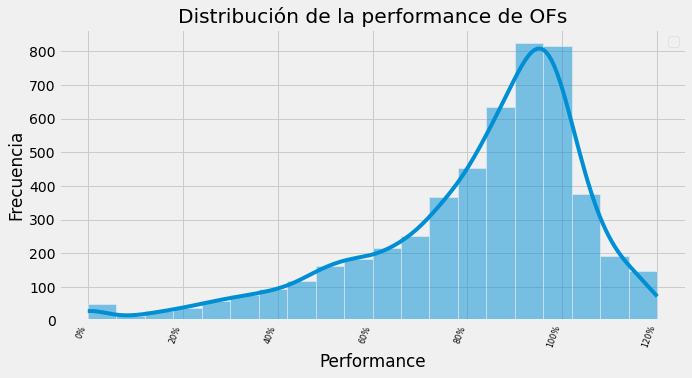

In [10]:
data = df_of.sort_values(by='performance', ascending=False)

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='performance', bins=20, kde=True)
plt.xlabel('Performance')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de la performance de OFs')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().legend().set_visible(True)
plt.gca().xaxis.set_major_formatter(decimal_percentage_formatter_func)
plt.show()

# Distribución de Participación

In [11]:
df_operators_participation.head()

operator_id    order  participation_minutes  total_operators_minutes  \
0         5025  5160396             185.933283               185.933283   
1         5025  5165729             251.107000               251.107000   
2         5025  5169247             391.531283               779.781233   
3         5004  5169247             388.249950               779.781233   
4         5004  5171973              17.021267               367.533717   

   participation_percentage  of_performance   bomb_type     line  \
0                     100.0        0.914306        1210  LINEA_1   
1                     100.0        0.681622  01224-0890  LINEA_1   
2                      50.2        0.923336        1197  LINEA_1   
3                      49.8        0.923336        1197  LINEA_1   
4                       4.6        0.870668  01205-0810  LINEA_1   

   theorical_qty participation_category performance_category  
0       2.187450             95% - 100%           90% - 100%  
1       2.934179             95% - 100%            60% - 70%  
2       9.747265              50% - 55%           90% - 100%  
3       9.747265              45% - 50%           90% - 100%  
4       4.594171                0% - 5%            80% - 90%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


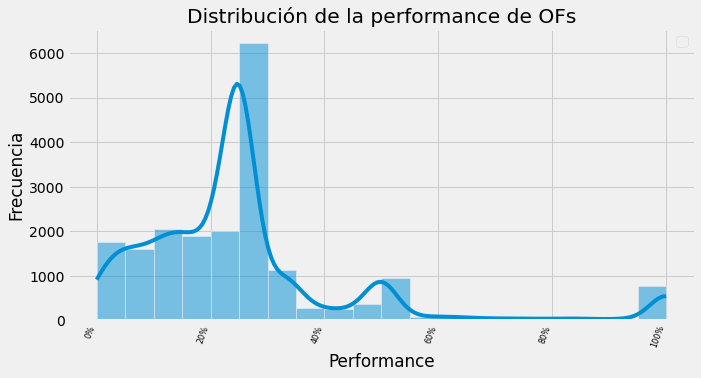

In [12]:
data = df_operators_participation.sort_values(by='participation_percentage', ascending=False)

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='participation_percentage', bins=20, kde=True)
plt.xlabel('Performance')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de la performance de OFs')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().xaxis.set_major_formatter(percentage_formatter)
plt.gca().legend().set_visible(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


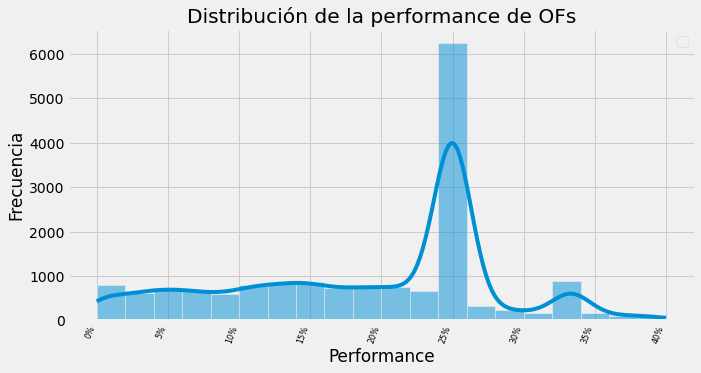

In [13]:
data = df_operators_participation[
    df_operators_participation.participation_percentage <= 40
].sort_values(by='participation_percentage', ascending=False)

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='participation_percentage', bins=20, kde=True)
plt.xlabel('Performance')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de la performance de OFs')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().xaxis.set_major_formatter(percentage_formatter)
plt.gca().legend().set_visible(True)
plt.show()

In [14]:
df_operators_participation.describe()

operator_id         order  participation_minutes  \
count  19736.000000  1.973600e+04           19736.000000   
mean    7426.565059  5.278015e+06             263.054343   
std     2996.455197  1.332644e+05             260.145323   
min        1.000000  2.741850e+05               0.037783   
25%     8164.000000  5.228260e+06              74.698383   
50%     8860.000000  5.295270e+06             195.278617   
75%     9265.000000  5.327082e+06             381.847204   
max     9994.000000  5.382060e+06            2808.686350   

       total_operators_minutes  participation_percentage  of_performance  \
count             19736.000000              19736.000000    19736.000000   
mean               1295.672538                 25.814897        0.819490   
std                1176.745070                 20.383601        0.219201   
min                   0.845000                  0.000000        0.000000   
25%                 428.290967                 13.800000        0.722176   
50%                1072.099025                 25.000000        0.885235   
75%                1854.723296                 25.400000        0.968393   
max               17392.383600                100.000000        1.199976   

       theorical_qty  
count   19736.000000  
mean      167.045972  
std       186.184760  
min         0.119014  
25%        38.380738  
50%       125.773474  
75%       254.020502  
max      4181.596591

# Preparación Modelo

## Supuestos

Supuestos
* Se asume un corte de performance aceptable para una OF sobre el  80%
* Se asume una participación mínima deun 5% del tiempo de un operador en una OF para considerar que trabajó en ella
* Para entrenar, se asume que la cantidad de bombas realizadas (good_qty) era lo planificado a hacer para la OF
* Se quita del análisis líneas que no son de interés para el cliente (LINEA 8 IML)

In [15]:
df_of_model = df_of.copy()
df_operators_participation_model = df_operators_participation.copy()
df_operators_model = df_operators.copy()

perfomance_cutoff = 1
participation_cutoff = 0.05
exclude_lines= ['LINEA_8_IML']

In [16]:
df_of_model.drop(['operators_distinct_ids', 'plan_qty', 'theorical_qty_round', 'performance_round', 'total_good_qty', 'total_bad_qty'], axis=1, inplace=True)
df_of_model = df_of_model[df_of_model.line.isin(exclude_lines) == False]
df_operators_participation_model = df_operators_participation_model[df_operators_participation_model.line.isin(exclude_lines) == False]  
print(df_of_model.describe())
df_of_model.head()

              order     good_qty  bad_qty  theorical_diff  theorical_time  \
count  4.146000e+03  4146.000000   4146.0     4146.000000     4146.000000   
mean   5.261866e+06   116.314279      0.0    29155.041727       22.918215   
std    9.931992e+04   149.169024      0.0    24643.329769       27.358786   
min    2.741850e+05     0.000000      0.0       26.000000        0.500000   
25%    5.207982e+06    12.000000      0.0    12127.000000        6.870000   
50%    5.256418e+06    60.000000      0.0    23888.500000        8.210000   
75%    5.315732e+06   180.000000      0.0    38405.000000       21.540000   
max    5.382060e+06  3000.000000      0.0   376798.000000       96.000000   

       time_diff_seconds_calculated  time_diff_minutes_calculated  \
count                   4146.000000                   4146.000000   
mean                   29155.048052                    485.917468   
std                    24643.315610                    410.721927   
min                       25.3

order   bomb_type     line  good_qty  bad_qty              start_date  \
0   274185     HPS050M  LINEA_2       0.0      0.0 2020-02-28 07:47:47.760   
1  5029646       25461  LINEA 4       0.0      0.0 2020-05-26 10:42:49.543   
2  5070828       11509  LINEA 6       0.0      0.0 2020-04-17 05:47:54.977   
3  5157110  01226-0890  LINEA_1       2.0      0.0 2020-01-27 12:04:52.480   
4  5158184    11509INT  LINEA 6      12.0      0.0 2020-01-18 11:48:44.873   

                 end_date  theorical_diff  theorical_time  \
0 2021-02-18 08:44:11.897           13189           13.35   
1 2021-04-07 05:41:01.177             120            8.80   
2 2022-08-10 06:10:35.247           32671           17.40   
3 2020-01-28 07:26:01.683           12623           85.58   
4 2020-01-18 12:46:26.833            3462           19.50   

   time_diff_seconds_calculated  time_diff_minutes_calculated  \
0                     13189.211                    219.820183   
1                       118.318                      1.971967   
2                     32671.480                    544.524667   
3                     12622.856                    210.380933   
4                      3461.960                     57.699333   

   total_operators_minutes  registers_qty  operators_distinct_qty  \
0               590.426267             10                      11   
1                 3.112383              4                       5   
2               594.821567              8                       3   
3               210.380933              8                       1   
4               230.797333              2                       4   

   theorical_qty  performance  time_diff_hours_calculated  \
0      44.226687     0.000000                    3.663670   
1       0.353680     0.000000                    0.032866   
2      34.185148     0.000000                    9.075411   
3       2.458296     0.813572                    3.506349   
4      11.835761     1.013877                    0.961656   

  performance_category weekday turn month  year  
0             0% - 10%       4   AM     2  2020  
1             0% - 10%       1   AM     5  2020  
2             0% - 10%       4   AM     4  2020  
3            80% - 90%       0   AM     1  2020  
4          100% - 110%       5   AM     1  2020

Removemos las OFs que no tenían cantidad palnificada *good_qty == 0*

In [17]:
df_of_model = df_of_model[df_of_model.good_qty != 0]

## Etiquetado de OFs

In [18]:
df_of_model['achieve_performance'] = df_of_model['performance'].apply(lambda x: 1 if x >= perfomance_cutoff else 0)
df_of_model.head()

order   bomb_type     line  good_qty  bad_qty              start_date  \
3  5157110  01226-0890  LINEA_1       2.0      0.0 2020-01-27 12:04:52.480   
4  5158184    11509INT  LINEA 6      12.0      0.0 2020-01-18 11:48:44.873   
5  5158571    11509INT  LINEA 6      48.0      0.0 2020-02-03 11:29:08.710   
6  5159132       65566  LINEA_3     177.0      0.0 2020-01-02 05:51:04.857   
7  5159134       65567  LINEA_2     270.0      0.0 2020-01-02 12:28:00.403   

                 end_date  theorical_diff  theorical_time  \
3 2020-01-28 07:26:01.683           12623           85.58   
4 2020-01-18 12:46:26.833            3462           19.50   
5 2020-02-04 09:29:27.740           22323           19.50   
6 2020-01-03 13:06:19.940           55912            6.87   
7 2020-01-08 06:20:32.553           36783            6.40   

   time_diff_seconds_calculated  time_diff_minutes_calculated  \
3                     12622.856                    210.380933   
4                      3461.960                     57.699333   
5                     22323.243                    372.054050   
6                     55912.126                    931.868767   
7                     36783.083                    613.051383   

   total_operators_minutes  registers_qty  operators_distinct_qty  \
3               210.380933              8                       1   
4               230.797333              2                       4   
5              1114.680950              7                       3   
6              1756.166533             20                       2   
7              2446.176833             25                       4   

   theorical_qty  performance  time_diff_hours_calculated  \
3       2.458296     0.813572                    3.506349   
4      11.835761     1.013877                    0.961656   
5      57.163126     0.839702                    6.200901   
6     255.628316     0.692412                   15.531146   
7     382.215130     0.706408                   10.217523   

  performance_category weekday turn month  year  achieve_performance  
3            80% - 90%       0   AM     1  2020                    0  
4          100% - 110%       5   AM     1  2020                    1  
5            80% - 90%       0   AM     2  2020                    0  
6            60% - 70%       3   AM     1  2020                    0  
7            70% - 80%       3   AM     1  2020                    0

## Etiquetado participacion

In [19]:
df_operators_participation_model['participation_indicator'] = df_operators_participation_model['participation_percentage'].apply(lambda x: 1 if x >= participation_cutoff*100 else 0)
df_operators_participation_model.head()

operator_id    order  participation_minutes  total_operators_minutes  \
0         5025  5160396             185.933283               185.933283   
1         5025  5165729             251.107000               251.107000   
2         5025  5169247             391.531283               779.781233   
3         5004  5169247             388.249950               779.781233   
4         5004  5171973              17.021267               367.533717   

   participation_percentage  of_performance   bomb_type     line  \
0                     100.0        0.914306        1210  LINEA_1   
1                     100.0        0.681622  01224-0890  LINEA_1   
2                      50.2        0.923336        1197  LINEA_1   
3                      49.8        0.923336        1197  LINEA_1   
4                       4.6        0.870668  01205-0810  LINEA_1   

   theorical_qty participation_category performance_category  \
0       2.187450             95% - 100%           90% - 100%   
1       2.934179             95% - 100%            60% - 70%   
2       9.747265              50% - 55%           90% - 100%   
3       9.747265              45% - 50%           90% - 100%   
4       4.594171                0% - 5%            80% - 90%   

   participation_indicator  
0                        1  
1                        1  
2                        1  
3                        1  
4                        0

In [20]:
# Pivotear el dataframe df_operators_participation para obtener las columnas de operadores
df_operators_participation_model.drop_duplicates(inplace=True)
df_pivot = df_operators_participation_model.pivot(index='order', columns='operator_id', values='participation_indicator')
df_pivot = df_pivot.fillna(0)
df_pivot.columns = ['operator_' + str(col) for col in df_pivot.columns]
df_pivot = df_pivot.astype(int)
print(df_pivot.shape)
df_pivot.head()

(4146, 102)


operator_37  operator_50  operator_215  operator_287  operator_412  \
order                                                                         
274185             0            0             0             1             0   
5029646            0            0             0             0             0   
5070828            0            0             0             0             0   
5157110            0            0             0             0             0   
5158184            0            0             0             1             0   

         operator_504  operator_642  operator_643  operator_654  operator_657  \
order                                                                           
274185              0             0             0             0             0   
5029646             0             0             0             0             0   
5070828             0             0             0             0             0   
5157110             0             0             0             0             0   
5158184             1             0             0             0             0   

         operator_662  operator_918  operator_1007  operator_5004  \
order                                                               
274185              0             0              0              0   
5029646             0             0              0              0   
5070828             0             0              0              0   
5157110             0             0              0              0   
5158184             0             0              1              0   

         operator_5015  operator_5020  operator_5025  operator_5030  \
order                                                                 
274185               0              0              0              0   
5029646              0              1              0              0   
5070828              0              0              0              0   
5157110              0              0              1              0   
5158184              0              0              0              0   

         operator_5033  operator_5036  operator_5069  operator_5096  \
order                                                                 
274185               0              0              0              0   
5029646              0              0              0              0   
5070828              1              0              0              0   
5157110              0              0              0              0   
5158184              0              0              0              0   

         operator_7009  operator_7028  operator_8007  operator_8093  \
order                                                                 
274185               0              0              0              0   
5029646              0              0              0              0   
5070828              0              0              0              0   
5157110              0              0              0              0   
5158184              0              0              0              0   

         operator_8164  operator_8177  operator_8230  operator_8250  \
order                                                                 
274185               1              1              1              0   
5029646              0              0              0              0   
5070828              0              0              0              0   
5157110              0              0              0              0   
5158184              0              0              0              0   

         operator_8372  operator_8615  operator_8676  operator_8721  \
order                                                                 
274185               0              1              0              0   
5029646              0              0              0              0   
5070828              0              0              0              0   
5157110              0              0              0    

In [21]:
df_merged = pd.merge(df_of_model, df_pivot, on='order', how='left')
df_merged.head()

order   bomb_type     line  good_qty  bad_qty              start_date  \
0  5157110  01226-0890  LINEA_1       2.0      0.0 2020-01-27 12:04:52.480   
1  5158184    11509INT  LINEA 6      12.0      0.0 2020-01-18 11:48:44.873   
2  5158571    11509INT  LINEA 6      48.0      0.0 2020-02-03 11:29:08.710   
3  5159132       65566  LINEA_3     177.0      0.0 2020-01-02 05:51:04.857   
4  5159134       65567  LINEA_2     270.0      0.0 2020-01-02 12:28:00.403   

                 end_date  theorical_diff  theorical_time  \
0 2020-01-28 07:26:01.683           12623           85.58   
1 2020-01-18 12:46:26.833            3462           19.50   
2 2020-02-04 09:29:27.740           22323           19.50   
3 2020-01-03 13:06:19.940           55912            6.87   
4 2020-01-08 06:20:32.553           36783            6.40   

   time_diff_seconds_calculated  time_diff_minutes_calculated  \
0                     12622.856                    210.380933   
1                      3461.960                     57.699333   
2                     22323.243                    372.054050   
3                     55912.126                    931.868767   
4                     36783.083                    613.051383   

   total_operators_minutes  registers_qty  operators_distinct_qty  \
0               210.380933              8                       1   
1               230.797333              2                       4   
2              1114.680950              7                       3   
3              1756.166533             20                       2   
4              2446.176833             25                       4   

   theorical_qty  performance  time_diff_hours_calculated  \
0       2.458296     0.813572                    3.506349   
1      11.835761     1.013877                    0.961656   
2      57.163126     0.839702                    6.200901   
3     255.628316     0.692412                   15.531146   
4     382.215130     0.706408                   10.217523   

  performance_category weekday turn month  year  achieve_performance  \
0            80% - 90%       0   AM     1  2020                    0   
1          100% - 110%       5   AM     1  2020                    1   
2            80% - 90%       0   AM     2  2020                    0   
3            60% - 70%       3   AM     1  2020                    0   
4            70% - 80%       3   AM     1  2020                    0   

   operator_37  operator_50  operator_215  operator_287  operator_412  \
0            0            0             0             0             0   
1            0            0             0             1             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   operator_504  operator_642  operator_643  operator_654  operator_657  \
0             0             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
0             0             0              0              0              0   
1             0             0              1              0              0   
2             0             0              0              0              0   
3             0             0              1              0              0   
4             0             1              0              0              0   

   operator_5020  operator_5025  operator_5030  operator_5033  operator_5036  \
0              0              1              0              0              0   
1              0              0             

In [22]:
# REVISAR CASO DE OPERADOR-ORDER duplicado
#df_operators_participation_model[(df_operators_participation_model.order == 5309158) & (df_operators_participation_model.operator_id == 1)]

# Pruebas modelos

## XGBoost Classifier

In [23]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
df = df_merged.copy()

TARGET = 'achieve_performance'
exclude_columns = ['order', 'bomb_type', 'start_date', 'end_date', 'bad_qty', 'theorical_diff', 'total_operators_minutes', 'theorical_qty',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated',
                   'time_diff_hours_calculated', 'performance', 'performance_category'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

In [25]:
# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

In [26]:
X_encoded = pd.get_dummies(X)
X_encoded

good_qty  theorical_time  registers_qty  operators_distinct_qty  \
0          2.0           85.58              8                       1   
1         12.0           19.50              2                       4   
2         48.0           19.50              7                       3   
3        177.0            6.87             20                       2   
4        270.0            6.40             25                       4   
...        ...             ...            ...                     ...   
4100     270.0            6.87             23                       7   
4101     540.0            6.87             54                       7   
4102     150.0            6.87             18                       7   
4103      66.0            8.50              5                       1   
4104     132.0            8.50              8                       1   

      operator_37  operator_50  operator_215  operator_287  operator_412  \
0               0            0             0             0             0   
1               0            0             0             1             0   
2               0            0             0             0             0   
3               0            0             0             0             0   
4               0            0             0             0             0   
...           ...          ...           ...           ...           ...   
4100            0            0             0             1             0   
4101            0            0             0             1             0   
4102            0            0             0             1             0   
4103            0            0             0             0             0   
4104            0            0             0             0             0   

      operator_504  operator_642  operator_643  operator_654  operator_657  \
0                0             0             0             0             0   
1                1             0             0             0             0   
2                1             0             0             0             0   
3                0             0             0             0             0   
4                1             0             0             0             0   
...            ...           ...           ...           ...           ...   
4100             0             0             0             0             0   
4101             0             0             0             0             0   
4102             0             0             0             0             0   
4103             0             0             0             0             0   
4104             0             0             0             0             0   

      operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
0                0             0              0              0              0   
1                0             0              1              0              0   
2                0             0              0              0              0   
3                0             0              1              0              0   
4                0             1              0              0              0   
...            ...           ...            ...            ...            ...   
4100             0             1              0              0              0   
4101             0             1              0              0              0   
4102             0             1              0              0              0   
4103             0             0              0              0              0   
4104             0             0              0              0              0   

      operator_5020  operator_5025  operator_5030  operator_5033  \
0                 0              1              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0

In [27]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [28]:
# Crear el clasificador XGBoost
model = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, verbose=True)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

result = X_test.copy()
result['prediction'] = y_pred
result['prediction_prob'] = y_pred_proba

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: %.2f%%" % (accuracy * 100.0))

/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precisión del modelo: 81.97%


In [29]:
df_result_complete = pd.concat([result, df_merged[df_merged.index.isin(result.index)].loc[:, ~df_merged.columns.isin(result.columns)]], axis=1)
df_result_complete.head()

good_qty  theorical_time  registers_qty  operators_distinct_qty  \
6        2.0           85.00              4                       1   
8       90.0           21.54             25                       4   
12       8.0           71.00             19                       2   
14      30.0            9.96              4                       4   
17      12.0            9.83              3                       1   

    operator_37  operator_50  operator_215  operator_287  operator_412  \
6             0            0             0             0             0   
8             0            0             0             1             0   
12            0            0             0             0             0   
14            0            0             0             1             0   
17            0            0             0             0             0   

    operator_504  operator_642  operator_643  operator_654  operator_657  \
6              0             0             0             0             0   
8              0             0             0             0             0   
12             0             0             0             0             0   
14             0             0             0             0             0   
17             0             0             0             0             0   

    operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
6              0             0              0              0              0   
8              0             0              0              0              0   
12             0             0              1              0              0   
14             0             1              0              0              0   
17             0             0              0              0              0   

    operator_5020  operator_5025  operator_5030  operator_5033  operator_5036  \
6               0              1              0              0              0   
8               0              0              0              0              0   
12              0              0              0              1              0   
14              0              0              0              0              0   
17              0              1              0              0              0   

    operator_5069  operator_5096  operator_7009  operator_7028  operator_8007  \
6               0              0              0              0              0   
8               0              0              0              1              0   
12              0              0              0              0              0   
14              0              0              0              0              0   
17              0              0              0              0              0   

    operator_8093  operator_8164  operator_8177  operator_8230  operator_8250  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              0              0              1              0              0   
17              0              0              0              0              0   

    operator_8372  operator_8615  operator_8676  operator_8721  operator_8733  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              0              1              0              0              0   
17              0              0              0              0              0   

    operator_8752  operator_8820  operator_8821  operator_8822  operator_8824  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12       

In [30]:
df_of[df_of.order == 5294563]   

order   bomb_type     line  plan_qty  total_good_qty  total_bad_qty  \
2693  5294563  25463-0810  LINEA 4      50.0            45.0            0.0   

      good_qty  bad_qty              start_date                end_date  \
2693      24.0      0.0 2022-01-13 06:49:13.607 2022-01-13 10:43:19.590   

      theorical_diff  theorical_time  time_diff_seconds_calculated  \
2693            9327             7.1                       9327.01   

      time_diff_minutes_calculated  total_operators_minutes  \
2693                    155.450167               310.900333   

     operators_distinct_ids  registers_qty  operators_distinct_qty  \
2693       ['9279', '9120']              7                       2   

      theorical_qty  theorical_qty_round  performance  performance_round  \
2693      43.788779                 44.0     0.548086           0.545455   

      time_diff_hours_calculated performance_category weekday turn month  year  
2693                    2.590836            50% - 60%       3   AM     1  2022

In [31]:
# df_result_complete[df_result_complete.achieve_performance != df_result_complete.prediction]
df_result_complete[(df_result_complete.achieve_performance == 1) & (df_result_complete.prediction == 0)]

good_qty  theorical_time  registers_qty  operators_distinct_qty  \
30         7.0           20.50              2                       2   
99       150.0            6.87             14                       3   
109       12.0           80.00             16                       2   
149      120.0           11.05              8                       4   
211      240.0            6.87             19                       8   
...        ...             ...            ...                     ...   
3971      12.0            9.70              5                       1   
3987      14.0           72.00             25                       2   
3999       7.0           72.00              9                       2   
4074      30.0            7.10              9                       2   
4095     328.0            6.87             27                       7   

      operator_37  operator_50  operator_215  operator_287  operator_412  \
30              0            0             0             0             0   
99              0            0             0             0             0   
109             0            0             0             0             0   
149             0            0             0             0             0   
211             0            0             0             1             0   
...           ...          ...           ...           ...           ...   
3971            0            0             0             0             0   
3987            0            0             0             0             0   
3999            0            0             0             0             0   
4074            0            0             0             0             0   
4095            0            0             0             1             0   

      operator_504  operator_642  operator_643  operator_654  operator_657  \
30               1             0             0             0             0   
99               0             0             0             0             0   
109              0             0             0             0             0   
149              0             0             0             0             0   
211              0             0             0             0             0   
...            ...           ...           ...           ...           ...   
3971             0             0             0             0             0   
3987             0             0             0             0             0   
3999             0             0             0             0             0   
4074             0             0             0             0             0   
4095             0             0             0             0             0   

      operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
30               0             0              0              0              0   
99               0             1              0              0              0   
109              0             0              0              0              0   
149              0             0              0              0              0   
211              0             1              0              0              0   
...            ...           ...            ...            ...            ...   
3971             0             0              0              0              0   
3987             0             0              1              1              0   
3999             0             0              1              0              0   
4074             0             0              0              0              0   
4095             0             1              0              0              0   

      operator_5020  operator_5025  operator_5030  operator_5033  \
30                0              0              0              0   
99                0              0              0              0   
109               0              1              0              0   
149               0              0

In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 divisiones
scores = cross_val_score(model, X_encoded, y, cv=5)

# Mostrar las puntuaciones de rendimiento en cada división
print("Puntuaciones de rendimiento en cada división:", scores)

# Calcular la media y desviación estándar de las puntuaciones de rendimiento
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Media de las puntuaciones de rendimiento:", mean_score)
print("Desviación estándar de las puntuaciones de rendimiento:", std_score)

/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Puntuaciones de rendimiento en cada división: [0.79658952 0.80024361 0.80511571 0.77831912 0.75152253]
Media de las puntuaciones de rendimiento: 0.7863580998781974
Desviación estándar de las puntuaciones de rendimiento: 0.019634047921666148


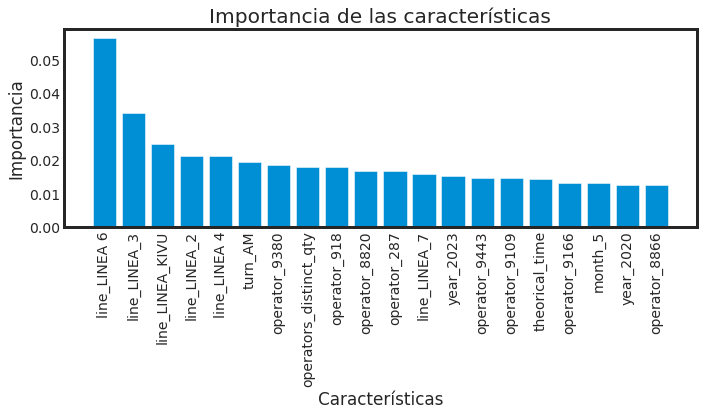

In [33]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = model.feature_importances_

# Obtener los nombres de las características
feature_names = X_encoded.columns

# Ordenar las importancias y los nombres de las características en orden descendente
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices][:20]
sorted_feature_names = feature_names[indices][:20]

# Visualizar la importancia de las características en un gráfico de barras
sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import numpy as np

# Seleccionar las columnas relevantes para el análisis
columns = ['line_LINEA_3', 'line_LINEA_1', 'line_LINEA_2', 'good_qty', 'theorical_time', 'operator_9266', 'operator_1007', 'operator_504', 'performance']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_corr = df_result_complete[columns]

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                line_LINEA_3  line_LINEA_1  line_LINEA_2  good_qty  \
line_LINEA_3        1.000000     -0.144483     -0.306143  0.007777   
line_LINEA_1       -0.144483      1.000000     -0.235113 -0.272519   
line_LINEA_2       -0.306143     -0.235113      1.000000  0.356882   
good_qty            0.007777     -0.272519      0.356882  1.000000   
theorical_time     -0.199669      0.769413     -0.395143 -0.431944   
operator_9266      -0.050546     -0.038818      0.165106  0.164291   
operator_1007       0.133173     -0.013054     -0.195163 -0.135510   
operator_504        0.715247     -0.130334     -0.230446 -0.002037   
performance        -0.190938      0.066514      0.088763  0.227621   

                theorical_time  operator_9266  operator_1007  operator_504  \
line_LINEA_3         -0.199669      -0.050546       0.133173      0.715247   
line_LINEA_1          0.769413      -0.038818      -0.013054     -0.130334   
line_LINEA_2         -0.395143       0.165106      -0.195163     

Importance Permutatios

In [35]:
from sklearn.inspection import permutation_importance

# Calcular la importancia de las permutaciones
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Obtener los puntajes de importancia
importance_scores = result.importances_mean

In [36]:
df_importance_perm = pd.DataFrame({'feature': X_encoded.columns, 'importance': result.importances_mean})

In [37]:
data = df_importance_perm[df_importance_perm.importance != 0.00]
data = df_importance_perm

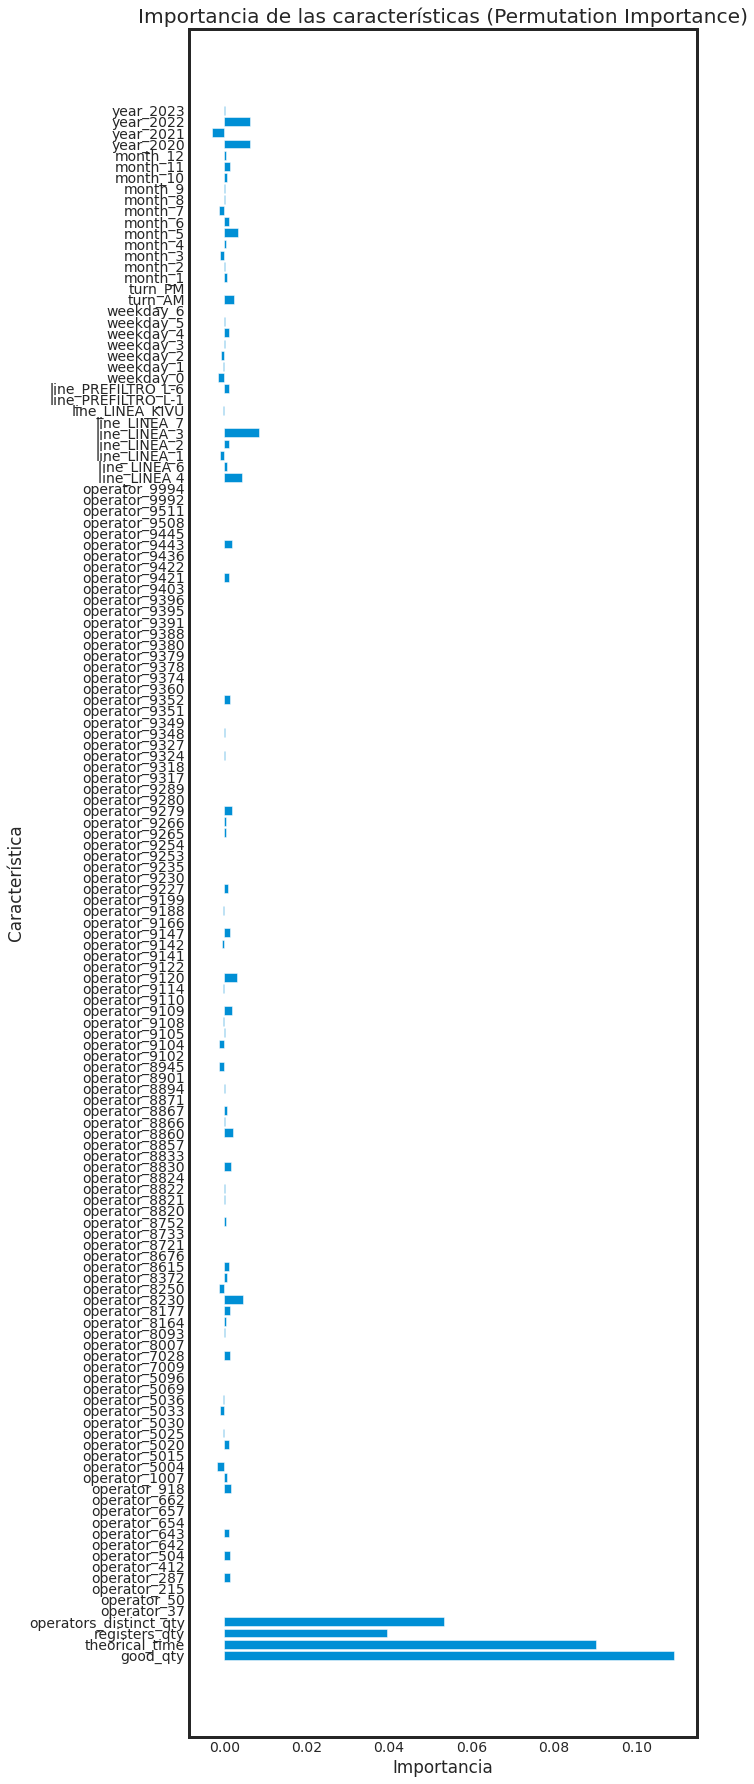

In [38]:
feature_names = data.feature
importance_scores = data.importance

# Crear un gráfico de barras de la importancia de las características
plt.figure(figsize=(10, 25))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características (Permutation Importance)')
plt.tight_layout()
plt.show()

Matriz de confusión

In [39]:
y_true = df_result_complete['achieve_performance']
y_pred = df_result_complete['prediction']

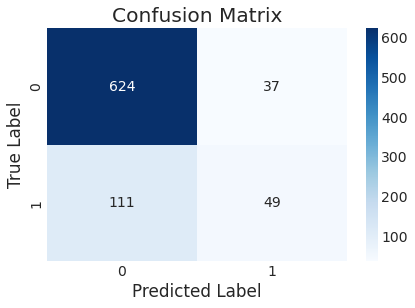

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Curva ROC

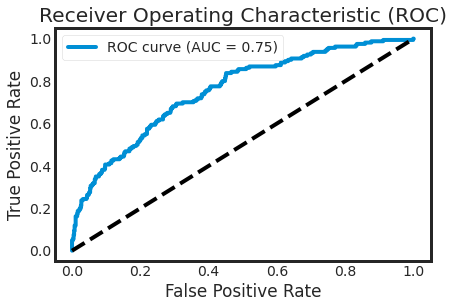

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular las probabilidades de las clases positivas
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


Curva precisión Recal

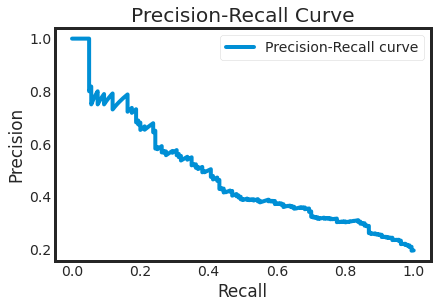

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calcular la precisión y la exhaustividad
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Graficar la curva de Precisión-Recall
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## XGBoost Regressor | Minutos-hombre 

In [43]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [44]:
df = df_merged.copy()

TARGET = 'total_operators_minutes'
exclude_columns = ['order', 'bomb_type', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'performance',
                   'time_diff_hours_calculated', 'achieve_performance', 'performance_category'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

In [45]:
# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

In [46]:
X_encoded = pd.get_dummies(X)
X_encoded

good_qty  bad_qty  theorical_time  registers_qty  \
0          2.0      0.0           85.58              8   
1         12.0      0.0           19.50              2   
2         48.0      0.0           19.50              7   
3        177.0      0.0            6.87             20   
4        270.0      0.0            6.40             25   
...        ...      ...             ...            ...   
4100     270.0      0.0            6.87             23   
4101     540.0      0.0            6.87             54   
4102     150.0      0.0            6.87             18   
4103      66.0      0.0            8.50              5   
4104     132.0      0.0            8.50              8   

      operators_distinct_qty  operator_37  operator_50  operator_215  \
0                          1            0            0             0   
1                          4            0            0             0   
2                          3            0            0             0   
3                          2            0            0             0   
4                          4            0            0             0   
...                      ...          ...          ...           ...   
4100                       7            0            0             0   
4101                       7            0            0             0   
4102                       7            0            0             0   
4103                       1            0            0             0   
4104                       1            0            0             0   

      operator_287  operator_412  operator_504  operator_642  operator_643  \
0                0             0             0             0             0   
1                1             0             1             0             0   
2                0             0             1             0             0   
3                0             0             0             0             0   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
4100             1             0             0             0             0   
4101             1             0             0             0             0   
4102             1             0             0             0             0   
4103             0             0             0             0             0   
4104             0             0             0             0             0   

      operator_654  operator_657  operator_662  operator_918  operator_1007  \
0                0             0             0             0              0   
1                0             0             0             0              1   
2                0             0             0             0              0   
3                0             0             0             0              1   
4                0             0             0             1              0   
...            ...           ...           ...           ...            ...   
4100             0             0             0             1              0   
4101             0             0             0             1              0   
4102             0             0             0             1              0   
4103             0             0             0             0              0   
4104             0             0             0             0              0   

      operator_5004  operator_5015  operator_5020  operator_5025  \
0                 0              0              0              1   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
4100              0              0              0              0   
4101          

In [47]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [48]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

result = X_test.copy()
result['prediction'] = y_pred



In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



print("R-squared [R2]: %.2f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.96
Mean Absolute Error [MAE]: 117.53
Mean Squared Error [MSE]: 38433.82
Root Mean Squared Error [RMSE]: 196.05


Creamos la variable 'predicted_performance' para comoparar la performance real versus la calculada con la predicción

In [50]:
result['predicted_performance'] = (result.good_qty*result.theorical_time) / result.prediction
result.head()   

good_qty  bad_qty  theorical_time  registers_qty  \
2470     180.0      0.0           10.00             18   
564       12.0      0.0            9.83              8   
731      240.0      0.0            6.87             18   
1073      90.0      0.0           21.54             37   
2409     166.0      0.0           10.00             23   

      operators_distinct_qty  operator_37  operator_50  operator_215  \
2470                       3            0            0             0   
564                        2            0            0             0   
731                        4            0            0             0   
1073                       2            0            0             0   
2409                       3            0            0             0   

      operator_287  operator_412  operator_504  operator_642  operator_643  \
2470             0             0             1             0             0   
564              0             0             0             0             0   
731              0             0             0             0             0   
1073             0             0             0             0             0   
2409             0             0             1             0             0   

      operator_654  operator_657  operator_662  operator_918  operator_1007  \
2470             0             0             0             0              0   
564              0             0             0             0              0   
731              0             0             0             1              0   
1073             0             0             0             0              0   
2409             0             0             0             0              0   

      operator_5004  operator_5015  operator_5020  operator_5025  \
2470              0              0              0              0   
564               1              0              0              0   
731               0              0              0              0   
1073              0              0              0              0   
2409              0              0              0              0   

      operator_5030  operator_5033  operator_5036  operator_5069  \
2470              0              0              0              0   
564               0              1              0              0   
731               0              0              0              0   
1073              0              0              0              0   
2409              0              0              0              0   

      operator_5096  operator_7009  operator_7028  operator_8007  \
2470              0              0              0              0   
564               0              0              0              0   
731               0              0              0              0   
1073              0              0              0              0   
2409              0              0              0              0   

      operator_8093  operator_8164  operator_8177  operator_8230  \
2470              0              0              0              0   
564               0              0              0              0   
731               0              0              1              0   
1073              1              0              0              0   
2409              0              0              0              0   

      operator_8250  operator_8372  operator_8615  operator_8676  \
2470              0              0              0              0   
564               0              0              0              0   
731               0              0              1              0   
1073              0              0              0              0   
2409              0              0              0              0   

      operator_8721  operator_8733  operator_8752  operator_8820  \
2470              0              0              0              0   
564               0              0              0              0   
731               0            

Join de results with the OFs dataframe

In [51]:
df_result_complete = pd.concat([result, df_merged[df_merged.index.isin(result.index)].loc[:, ~df_merged.columns.isin(result.columns)]], axis=1)
df_result_complete.head()

good_qty  bad_qty  theorical_time  registers_qty  operators_distinct_qty  \
6        2.0      0.0           85.00              4                       1   
8       90.0      0.0           21.54             25                       4   
12       8.0      0.0           71.00             19                       2   
14      30.0      0.0            9.96              4                       4   
17      12.0      0.0            9.83              3                       1   

    operator_37  operator_50  operator_215  operator_287  operator_412  \
6             0            0             0             0             0   
8             0            0             0             1             0   
12            0            0             0             0             0   
14            0            0             0             1             0   
17            0            0             0             0             0   

    operator_504  operator_642  operator_643  operator_654  operator_657  \
6              0             0             0             0             0   
8              0             0             0             0             0   
12             0             0             0             0             0   
14             0             0             0             0             0   
17             0             0             0             0             0   

    operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
6              0             0              0              0              0   
8              0             0              0              0              0   
12             0             0              1              0              0   
14             0             1              0              0              0   
17             0             0              0              0              0   

    operator_5020  operator_5025  operator_5030  operator_5033  operator_5036  \
6               0              1              0              0              0   
8               0              0              0              0              0   
12              0              0              0              1              0   
14              0              0              0              0              0   
17              0              1              0              0              0   

    operator_5069  operator_5096  operator_7009  operator_7028  operator_8007  \
6               0              0              0              0              0   
8               0              0              0              1              0   
12              0              0              0              0              0   
14              0              0              0              0              0   
17              0              0              0              0              0   

    operator_8093  operator_8164  operator_8177  operator_8230  operator_8250  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              0              0              1              0              0   
17              0              0              0              0              0   

    operator_8372  operator_8615  operator_8676  operator_8721  operator_8733  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              0              1              0              0              0   
17              0              0              0              0              0   

    operator_8752  operator_8820  operator_8821  operator_8822  operator_8824  \
6               0              0              0              0              0   
8               0              0    

Precisión del modelo evaluando performance

In [52]:
r2 = r2_score(df_result_complete.performance, df_result_complete.predicted_performance)
mae = mean_absolute_error(df_result_complete.performance, df_result_complete.predicted_performance)
mse = mean_squared_error(df_result_complete.performance, df_result_complete.predicted_performance)
rmse = np.sqrt(mse)



print("R-squared [R2]: %.2f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: -0.02
Mean Absolute Error [MAE]: 0.12
Mean Squared Error [MSE]: 0.03
Root Mean Squared Error [RMSE]: 0.19


Validación cruzada

In [53]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 divisiones
scores = cross_val_score(model, X_encoded, y, cv=5)

# Mostrar las puntuaciones de rendimiento en cada división
print("Puntuaciones de rendimiento en cada división:", scores)

# Calcular la media y desviación estándar de las puntuaciones de rendimiento
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Media de las puntuaciones de rendimiento:", mean_score)
print("Desviación estándar de las puntuaciones de rendimiento:", std_score)

Puntuaciones de rendimiento en cada división: [0.9584072  0.91934071 0.94447916 0.90961062 0.93533102]
Media de las puntuaciones de rendimiento: 0.933433742142847
Desviación estándar de las puntuaciones de rendimiento: 0.01740936118409234


In [54]:
comparison = pd.DataFrame({'TARGET': y_test, 'Predict': y_pred})
print(comparison)


           TARGET      Predict
2470  1845.141683  1886.719116
564    188.458667   281.606079
731   1650.169417  1704.441772
1073  1949.779100  2304.930176
2409  2212.864000  2418.489502
...           ...          ...
1018   449.432567   479.091583
2147  2190.309367  2238.707031
254   1179.964600  1252.599243
2770  1385.854250  1221.954712
2304   224.079383   384.872742

[821 rows x 2 columns]


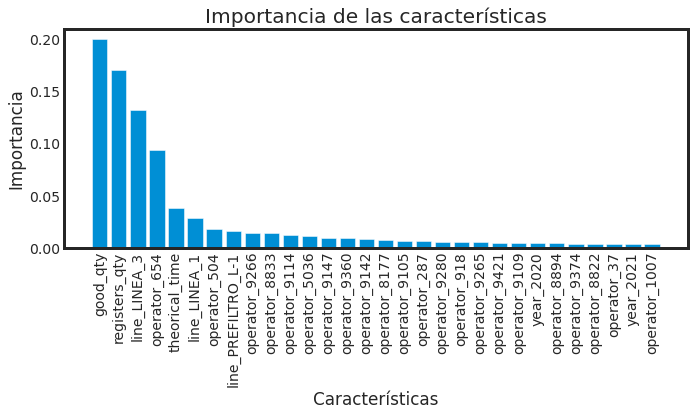

In [55]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = model.feature_importances_

# Obtener los nombres de las características
feature_names = X_encoded.columns

# Ordenar las importancias y los nombres de las características en orden descendente
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices][:30]
sorted_feature_names = feature_names[indices][:30]

# Visualizar la importancia de las características en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.tight_layout()
plt.show()

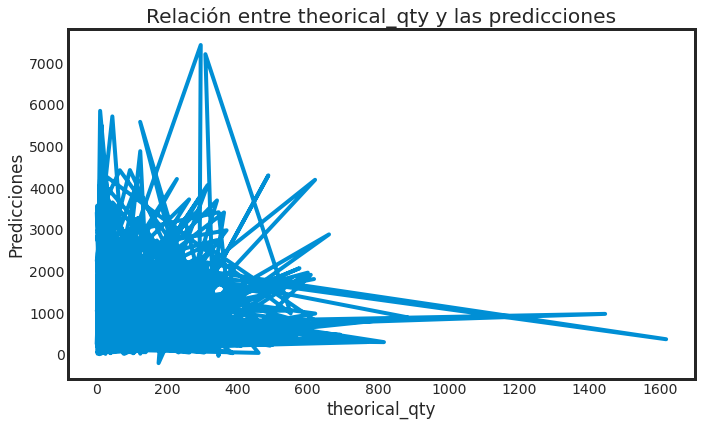

In [56]:
feature_name = 'theorical_qty'
# Graficar la relación entre la característica y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(df_result_complete[feature_name], y_pred)
plt.xlabel(feature_name)
plt.ylabel('Predicciones')
plt.title('Relación entre {} y las predicciones'.format(feature_name))
plt.show()

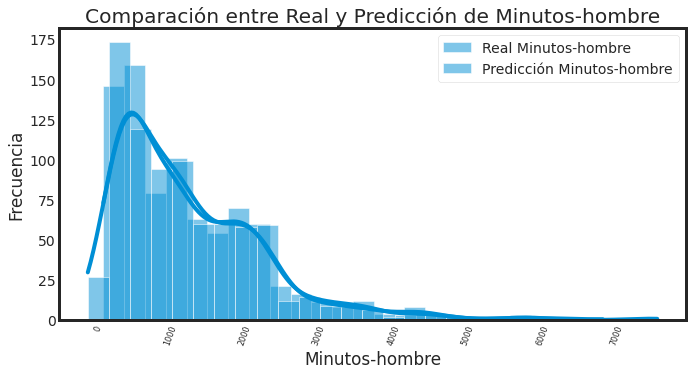

In [57]:
data = df_result_complete.sort_values(by='total_operators_minutes', ascending=False)

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='total_operators_minutes', kde=True, label='Real Minutos-hombre')
sns.histplot(data=data, x='prediction', kde=True, label='Predicción Minutos-hombre')
plt.xlabel('Minutos-hombre')
plt.ylabel('Frecuencia')
plt.title(f'Comparación entre Real y Predicción de Minutos-hombre')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().legend().set_visible(True)
plt.show()

## XGBoost Regressor | Performance

In [58]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [59]:
df = df_merged.copy()

TARGET = 'performance'
exclude_columns = ['order', 'bomb_type', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'total_operators_minutes',
                   'time_diff_hours_calculated', 'achieve_performance', 'performance_category'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

In [60]:
# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

In [61]:
X_encoded = pd.get_dummies(X)
X_encoded

good_qty  bad_qty  theorical_time  registers_qty  \
0          2.0      0.0           85.58              8   
1         12.0      0.0           19.50              2   
2         48.0      0.0           19.50              7   
3        177.0      0.0            6.87             20   
4        270.0      0.0            6.40             25   
...        ...      ...             ...            ...   
4100     270.0      0.0            6.87             23   
4101     540.0      0.0            6.87             54   
4102     150.0      0.0            6.87             18   
4103      66.0      0.0            8.50              5   
4104     132.0      0.0            8.50              8   

      operators_distinct_qty  operator_37  operator_50  operator_215  \
0                          1            0            0             0   
1                          4            0            0             0   
2                          3            0            0             0   
3                          2            0            0             0   
4                          4            0            0             0   
...                      ...          ...          ...           ...   
4100                       7            0            0             0   
4101                       7            0            0             0   
4102                       7            0            0             0   
4103                       1            0            0             0   
4104                       1            0            0             0   

      operator_287  operator_412  operator_504  operator_642  operator_643  \
0                0             0             0             0             0   
1                1             0             1             0             0   
2                0             0             1             0             0   
3                0             0             0             0             0   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
4100             1             0             0             0             0   
4101             1             0             0             0             0   
4102             1             0             0             0             0   
4103             0             0             0             0             0   
4104             0             0             0             0             0   

      operator_654  operator_657  operator_662  operator_918  operator_1007  \
0                0             0             0             0              0   
1                0             0             0             0              1   
2                0             0             0             0              0   
3                0             0             0             0              1   
4                0             0             0             1              0   
...            ...           ...           ...           ...            ...   
4100             0             0             0             1              0   
4101             0             0             0             1              0   
4102             0             0             0             1              0   
4103             0             0             0             0              0   
4104             0             0             0             0              0   

      operator_5004  operator_5015  operator_5020  operator_5025  \
0                 0              0              0              1   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
4100              0              0              0              0   
4101          

In [62]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [63]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

result = X_test.copy()
result['prediction'] = y_pred



In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



print("R-squared [R2]: %.2f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.49
Mean Absolute Error [MAE]: 0.09
Mean Squared Error [MSE]: 0.02
Root Mean Squared Error [RMSE]: 0.13


Join de results with the OFs dataframe

In [65]:
df_result_complete = pd.concat([result, df_merged[df_merged.index.isin(result.index)].loc[:, ~df_merged.columns.isin(result.columns)]], axis=1)
df_result_complete.head()

good_qty  bad_qty  theorical_time  registers_qty  operators_distinct_qty  \
6        2.0      0.0           85.00              4                       1   
8       90.0      0.0           21.54             25                       4   
12       8.0      0.0           71.00             19                       2   
14      30.0      0.0            9.96              4                       4   
17      12.0      0.0            9.83              3                       1   

    operator_37  operator_50  operator_215  operator_287  operator_412  \
6             0            0             0             0             0   
8             0            0             0             1             0   
12            0            0             0             0             0   
14            0            0             0             1             0   
17            0            0             0             0             0   

    operator_504  operator_642  operator_643  operator_654  operator_657  \
6              0             0             0             0             0   
8              0             0             0             0             0   
12             0             0             0             0             0   
14             0             0             0             0             0   
17             0             0             0             0             0   

    operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
6              0             0              0              0              0   
8              0             0              0              0              0   
12             0             0              1              0              0   
14             0             1              0              0              0   
17             0             0              0              0              0   

    operator_5020  operator_5025  operator_5030  operator_5033  operator_5036  \
6               0              1              0              0              0   
8               0              0              0              0              0   
12              0              0              0              1              0   
14              0              0              0              0              0   
17              0              1              0              0              0   

    operator_5069  operator_5096  operator_7009  operator_7028  operator_8007  \
6               0              0              0              0              0   
8               0              0              0              1              0   
12              0              0              0              0              0   
14              0              0              0              0              0   
17              0              0              0              0              0   

    operator_8093  operator_8164  operator_8177  operator_8230  operator_8250  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              0              0              1              0              0   
17              0              0              0              0              0   

    operator_8372  operator_8615  operator_8676  operator_8721  operator_8733  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              0              1              0              0              0   
17              0              0              0              0              0   

    operator_8752  operator_8820  operator_8821  operator_8822  operator_8824  \
6               0              0              0              0              0   
8               0              0    

Validación cruzada

In [66]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 divisiones
scores = cross_val_score(model, X_encoded, y, cv=5)

# Mostrar las puntuaciones de rendimiento en cada división
print("Puntuaciones de rendimiento en cada división:", scores)

# Calcular la media y desviación estándar de las puntuaciones de rendimiento
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Media de las puntuaciones de rendimiento:", mean_score)
print("Desviación estándar de las puntuaciones de rendimiento:", std_score)

Puntuaciones de rendimiento en cada división: [0.36841316 0.50320011 0.43621528 0.33316796 0.274992  ]
Media de las puntuaciones de rendimiento: 0.3831977017462782
Desviación estándar de las puntuaciones de rendimiento: 0.07955057898958588


In [67]:
comparison = pd.DataFrame({'TARGET': y_test, 'Predict': y_pred})
print(comparison)


        TARGET   Predict
2470  0.975535  0.880279
564   0.625920  0.640543
731   0.999170  0.973844
1073  0.994266  0.933835
2409  0.750159  0.722078
...        ...       ...
1018  1.076914  1.094030
2147  0.972465  0.936248
254   0.873247  0.868033
2770  0.699424  0.797124
2304  1.006786  0.772183

[821 rows x 2 columns]


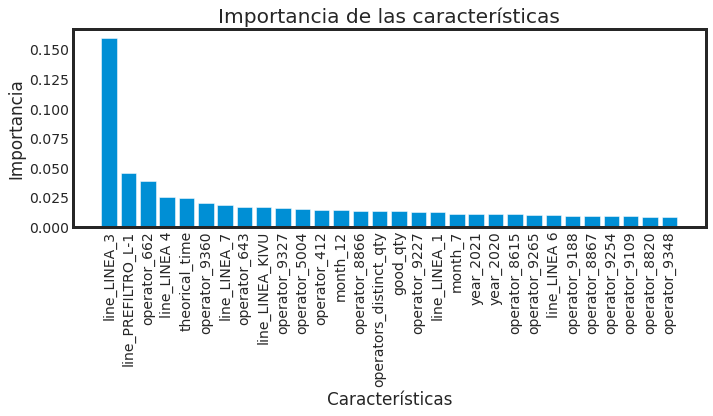

In [68]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = model.feature_importances_

# Obtener los nombres de las características
feature_names = X_encoded.columns

# Ordenar las importancias y los nombres de las características en orden descendente
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices][:30]
sorted_feature_names = feature_names[indices][:30]

# Visualizar la importancia de las características en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.tight_layout()
plt.show()

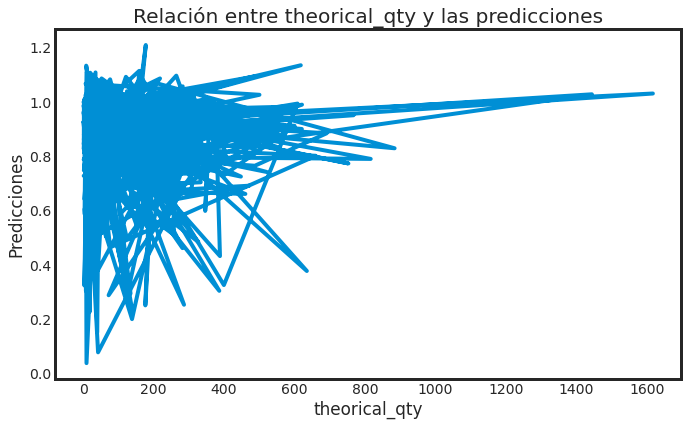

In [69]:
feature_name = 'theorical_qty'
# Graficar la relación entre la característica y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(df_result_complete[feature_name], y_pred)
plt.xlabel(feature_name)
plt.ylabel('Predicciones')
plt.title('Relación entre {} y las predicciones'.format(feature_name))
plt.show()

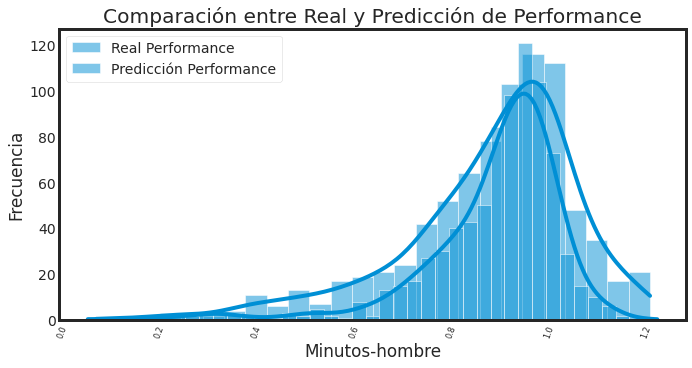

In [70]:
data = df_result_complete.sort_values(by='performance', ascending=False)

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='performance', kde=True, label='Real Performance')
sns.histplot(data=data, x='prediction', kde=True, label='Predicción Performance')
plt.xlabel('Minutos-hombre')
plt.ylabel('Frecuencia')
plt.title(f'Comparación entre Real y Predicción de Performance')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().legend().set_visible(True)
plt.show()

## XGBOOST REGRESSOR - PAU

Modelo teniendo en cuenta la siguiente información de entrada:

### Variable de entrada:

- line
- good_qty (Serà el plan_qty)
- theorical_time
- operator_(En este caso tendremos que ver la explicación según que pasa cuando vayan entrando nuevos operadores ya que no tendremos datos para entrar)
En este caso, lo mejor serà usar media, mediana o alguna de estas metricas para poder entrenar los nuevos operarios. En este caso no aplica

Las siguiente variables en el primer modelo será la fecha en que se va a planificar el batch de OFs
- weekday
- month
- year (Lo quitamos, ya que creo que no aporta nada el año en este caso. Ya que tendriamos que tener un vector de varios años para ir poniendo 0 o 1)

### Variable de salida:

- total_operators_minutes

In [71]:
df_merged.head()

order   bomb_type     line  good_qty  bad_qty              start_date  \
0  5157110  01226-0890  LINEA_1       2.0      0.0 2020-01-27 12:04:52.480   
1  5158184    11509INT  LINEA 6      12.0      0.0 2020-01-18 11:48:44.873   
2  5158571    11509INT  LINEA 6      48.0      0.0 2020-02-03 11:29:08.710   
3  5159132       65566  LINEA_3     177.0      0.0 2020-01-02 05:51:04.857   
4  5159134       65567  LINEA_2     270.0      0.0 2020-01-02 12:28:00.403   

                 end_date  theorical_diff  theorical_time  \
0 2020-01-28 07:26:01.683           12623           85.58   
1 2020-01-18 12:46:26.833            3462           19.50   
2 2020-02-04 09:29:27.740           22323           19.50   
3 2020-01-03 13:06:19.940           55912            6.87   
4 2020-01-08 06:20:32.553           36783            6.40   

   time_diff_seconds_calculated  time_diff_minutes_calculated  \
0                     12622.856                    210.380933   
1                      3461.960                     57.699333   
2                     22323.243                    372.054050   
3                     55912.126                    931.868767   
4                     36783.083                    613.051383   

   total_operators_minutes  registers_qty  operators_distinct_qty  \
0               210.380933              8                       1   
1               230.797333              2                       4   
2              1114.680950              7                       3   
3              1756.166533             20                       2   
4              2446.176833             25                       4   

   theorical_qty  performance  time_diff_hours_calculated  \
0       2.458296     0.813572                    3.506349   
1      11.835761     1.013877                    0.961656   
2      57.163126     0.839702                    6.200901   
3     255.628316     0.692412                   15.531146   
4     382.215130     0.706408                   10.217523   

  performance_category weekday turn month  year  achieve_performance  \
0            80% - 90%       0   AM     1  2020                    0   
1          100% - 110%       5   AM     1  2020                    1   
2            80% - 90%       0   AM     2  2020                    0   
3            60% - 70%       3   AM     1  2020                    0   
4            70% - 80%       3   AM     1  2020                    0   

   operator_37  operator_50  operator_215  operator_287  operator_412  \
0            0            0             0             0             0   
1            0            0             0             1             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   operator_504  operator_642  operator_643  operator_654  operator_657  \
0             0             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
0             0             0              0              0              0   
1             0             0              1              0              0   
2             0             0              0              0              0   
3             0             0              1              0              0   
4             0             1              0              0              0   

   operator_5020  operator_5025  operator_5030  operator_5033  operator_5036  \
0              0              1              0              0              0   
1              0              0             

In [72]:
# Filtrar las columnas que comienzan por "operator_"
filtered_columns = [col for col in df_merged.columns if col.startswith('operator_')]

# Mostrar las columnas filtradas en una lista
column_list = filtered_columns
print(column_list)
print(len(column_list))

['operator_37', 'operator_50', 'operator_215', 'operator_287', 'operator_412', 'operator_504', 'operator_642', 'operator_643', 'operator_654', 'operator_657', 'operator_662', 'operator_918', 'operator_1007', 'operator_5004', 'operator_5015', 'operator_5020', 'operator_5025', 'operator_5030', 'operator_5033', 'operator_5036', 'operator_5069', 'operator_5096', 'operator_7009', 'operator_7028', 'operator_8007', 'operator_8093', 'operator_8164', 'operator_8177', 'operator_8230', 'operator_8250', 'operator_8372', 'operator_8615', 'operator_8676', 'operator_8721', 'operator_8733', 'operator_8752', 'operator_8820', 'operator_8821', 'operator_8822', 'operator_8824', 'operator_8830', 'operator_8833', 'operator_8857', 'operator_8860', 'operator_8866', 'operator_8867', 'operator_8871', 'operator_8894', 'operator_8901', 'operator_8945', 'operator_9102', 'operator_9104', 'operator_9105', 'operator_9108', 'operator_9109', 'operator_9110', 'operator_9114', 'operator_9120', 'operator_9122', 'operator_

In [73]:
df = df_merged.copy()

TARGET = 'total_operators_minutes'
exclude_columns = ['order', 'bomb_type', 'bad_qty', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'performance',
                   'time_diff_hours_calculated', 'achieve_performance', 'performance_category', 'registers_qty', 'operators_distinct_qty', 'turn', 'year'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

In [74]:
# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

In [75]:
X_encoded = pd.get_dummies(X)
X_encoded

good_qty  theorical_time  operator_37  operator_50  operator_215  \
0          2.0           85.58            0            0             0   
1         12.0           19.50            0            0             0   
2         48.0           19.50            0            0             0   
3        177.0            6.87            0            0             0   
4        270.0            6.40            0            0             0   
...        ...             ...          ...          ...           ...   
4100     270.0            6.87            0            0             0   
4101     540.0            6.87            0            0             0   
4102     150.0            6.87            0            0             0   
4103      66.0            8.50            0            0             0   
4104     132.0            8.50            0            0             0   

      operator_287  operator_412  operator_504  operator_642  operator_643  \
0                0             0             0             0             0   
1                1             0             1             0             0   
2                0             0             1             0             0   
3                0             0             0             0             0   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
4100             1             0             0             0             0   
4101             1             0             0             0             0   
4102             1             0             0             0             0   
4103             0             0             0             0             0   
4104             0             0             0             0             0   

      operator_654  operator_657  operator_662  operator_918  operator_1007  \
0                0             0             0             0              0   
1                0             0             0             0              1   
2                0             0             0             0              0   
3                0             0             0             0              1   
4                0             0             0             1              0   
...            ...           ...           ...           ...            ...   
4100             0             0             0             1              0   
4101             0             0             0             1              0   
4102             0             0             0             1              0   
4103             0             0             0             0              0   
4104             0             0             0             0              0   

      operator_5004  operator_5015  operator_5020  operator_5025  \
0                 0              0              0              1   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
4100              0              0              0              0   
4101              0              0              0              0   
4102              0              0              0              0   
4103              0              0              0              0   
4104              0              0              0              0   

      operator_5030  operator_5033  operator_5036  operator_5069  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...   

In [76]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Modelo directo de Enrique

In [77]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

result = X_test.copy()
result['prediction'] = y_pred


In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.955812
Mean Absolute Error [MAE]: 118.16
Mean Squared Error [MSE]: 44257.07
Root Mean Squared Error [RMSE]: 210.37


### Modelo realizando un escalado en dos variables

In [79]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler y aplicar el escalado
scaler = MinMaxScaler()


In [80]:
df_scaled = pd.DataFrame(scaler.fit_transform(X_encoded[['good_qty', 'theorical_time']]), columns=['good_qty_scaled', 'theorical_time_scaled'])

# Realizar la inversión del escalado
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=['good_qty', 'theorical_time'])


# Combinar el dataframe original con las columnas escaladas
X_encoded_scaled = pd.concat([df_scaled, X_encoded], axis=1)

# Eliminar dos columnas del dataframe
X_encoded_scaled = X_encoded_scaled.drop(columns=['good_qty', 'theorical_time'])

X_encoded_scaled.head()

good_qty_scaled  theorical_time_scaled  operator_37  operator_50  \
0         0.000333               0.890890            0            0   
1         0.003668               0.198953            0            0   
2         0.015672               0.198953            0            0   
3         0.058686               0.066702            0            0   
4         0.089697               0.061780            0            0   

   operator_215  operator_287  operator_412  operator_504  operator_642  \
0             0             0             0             0             0   
1             0             1             0             1             0   
2             0             0             0             1             0   
3             0             0             0             0             0   
4             0             0             0             1             0   

   operator_643  operator_654  operator_657  operator_662  operator_918  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   operator_1007  operator_5004  operator_5015  operator_5020  operator_5025  \
0              0              0              0              0              1   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   operator_5030  operator_5033  operator_5036  operator_5069  operator_5096  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   operator_7009  operator_7028  operator_8007  operator_8093  operator_8164  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   operator_8177  operator_8230  operator_8250  operator_8372  operator_8615  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              1              0              0              1   

   operator_8676  operator_8721  operator_8733  operator_8752  operator_8820  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              1              0              0              0   
4              0              0              0              0              0   

   operator_8821  operator_8822  operator_8824  operator_8830  operator_8833  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0             

In [81]:
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Mostrar la serie escalada
print(y_scaled)

# Revertir el escalado y obtener los valores originales
y_inverse = scaler.inverse_transform(y_scaled)

# Convertir el arreglo NumPy resultante a una serie de pandas
y_original = pd.Series(y_inverse.flatten())

# Mostrar la serie original
print(y_original)


[[0.02137494]
 [0.02347646]
 [0.11445685]
 ...
 [0.11318585]
 [0.05830705]
 [0.13692856]]
0        210.380933
1        230.797333
2       1114.680950
3       1756.166533
4       2446.176833
           ...     
4100    1941.383633
4101    3994.120200
4102    1102.333133
4103     569.180067
4104    1332.995883
Length: 4105, dtype: float64


In [82]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

In [83]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_scaled, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

result = X_test_scaled.copy()
result['prediction'] = y_pred


In [84]:
# Revertir el escalado y obtener los valores originales
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = pd.Series(y_pred.flatten())

y_test_scaled = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_test_scaled = pd.Series(y_test_scaled.flatten())

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)



print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.961473
Mean Absolute Error [MAE]: 112.78
Mean Squared Error [MSE]: 38587.79
Root Mean Squared Error [RMSE]: 196.44


### Error modelo Enrique

- R-squared [R2]: 0.955812
- Mean Absolute Error [MAE]: 118.16
- Mean Squared Error [MSE]: 44257.07
- Root Mean Squared Error [RMSE]: 210.37

### Error modelo Pau

- R-squared [R2]: 0.961473
- Mean Absolute Error [MAE]: 112.78
- Mean Squared Error [MSE]: 38587.79
- Root Mean Squared Error [RMSE]: 196.44

### Hyperparameters of XGBRegressor

In [86]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

Primeros parametros:


        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)


In [87]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Definir la función objetivo para la optimización de Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 6, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 3),
        'gamma': trial.suggest_float('gamma', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.9, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.4, 0.6),
        'random_state': 42
    }

    # Crear el modelo XGBRegressor con los hiperparámetros propuestos
    model = xgb.XGBRegressor(**params)

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train_scaled)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)

    # Invertir la transformación sobre y_pred
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_pred = pd.Series(y_pred.flatten())

    # Invertir la transformación sobre y_test_scaled
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
    y_test = pd.Series(y_test.flatten())

    # Calcular el error MSE
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Crear el estudio de Optuna y ejecutar la optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params


[I 2023-05-20 12:00:50,035] A new study created in memory with name: no-name-575a3f90-78ab-4d5d-b6ed-8c4cf714eaf9
[I 2023-05-20 12:01:09,924] Trial 0 finished with value: 62227.51943182414 and parameters: {'max_depth': 7, 'learning_rate': 0.9145887611833797, 'n_estimators': 550, 'min_child_weight': 3, 'gamma': 0.013013898364715143, 'subsample': 0.8052956216514943, 'colsample_bytree': 0.941975452087057, 'reg_alpha': 0.6973752700540505, 'reg_lambda': 0.5817177250676029}. Best is trial 0 with value: 62227.51943182414.
[I 2023-05-20 12:01:45,095] Trial 1 finished with value: 67306.94081916497 and parameters: {'max_depth': 10, 'learning_rate': 0.5808862846408909, 'n_estimators': 997, 'min_child_weight': 2, 'gamma': 0.013473303772878514, 'subsample': 0.7012712350791551, 'colsample_bytree': 0.9579191739012732, 'reg_alpha': 0.8723082381307794, 'reg_lambda': 0.5818219677890648}. Best is trial 0 with value: 62227.51943182414.
[I 2023-05-20 12:01:54,699] Trial 2 finished with value: 87019.8109266

In [88]:
# Obtener los mejores parámetros encontrados
best_params = study.best_params

# Imprimir los mejores parámetros
print("Mejores hiperparámetros encontrados:")
for key, value in best_params.items():
    print(f"- {key}: {value}")


Mejores hiperparámetros encontrados:
- max_depth: 7
- learning_rate: 0.16913295440605722
- n_estimators: 916
- min_child_weight: 3
- gamma: 0.010750535937510585
- subsample: 0.85501298664216
- colsample_bytree: 0.9318258330273748
- reg_alpha: 0.5573852532776896
- reg_lambda: 0.48151398605137585


Mejores hiperparámetros encontrados:
- max_depth: 7
- learning_rate: 0.04215891448546176
- n_estimators: 802
- min_child_weight: 2
- gamma: 0.010299087705971835
- subsample: 0.7665097955177043
- colsample_bytree: 0.9320282195461901
- reg_alpha: 0.5086408853746989
- reg_lambda: 0.429196612685647

In [89]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

In [90]:
# Definir los mejores hiperparámetros encontrados
best_params = {
    'max_depth': 7,
    'learning_rate': 0.04215891448546176,
    'n_estimators': 802,
    'min_child_weight': 2,
    'gamma': 0.010299087705971835,
    'subsample': 0.7665097955177043,
    'colsample_bytree': 0.9320282195461901,
    'reg_alpha': 0.5086408853746989,
    'reg_lambda': 0.429196612685647,
    'random_state': 42
}

# Crear el modelo XGBRegressor con los mejores hiperparámetros
model = xgb.XGBRegressor(**best_params)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train_scaled)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [91]:
# Revertir el escalado y obtener los valores originales
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = pd.Series(y_pred.flatten())

y_test_scaled = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_test_scaled = pd.Series(y_test_scaled.flatten())

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)


print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.958847
Mean Absolute Error [MAE]: 128.91
Mean Squared Error [MSE]: 41217.17
Root Mean Squared Error [RMSE]: 203.02


Podemos hacer la ultima prueba, de ejecutar con rangos de los parametros mas grandes.

Vamos a eliminar algunos registros,vamos hacer feature engineering...

In [92]:
df_merged.head()

order   bomb_type     line  good_qty  bad_qty              start_date  \
0  5157110  01226-0890  LINEA_1       2.0      0.0 2020-01-27 12:04:52.480   
1  5158184    11509INT  LINEA 6      12.0      0.0 2020-01-18 11:48:44.873   
2  5158571    11509INT  LINEA 6      48.0      0.0 2020-02-03 11:29:08.710   
3  5159132       65566  LINEA_3     177.0      0.0 2020-01-02 05:51:04.857   
4  5159134       65567  LINEA_2     270.0      0.0 2020-01-02 12:28:00.403   

                 end_date  theorical_diff  theorical_time  \
0 2020-01-28 07:26:01.683           12623           85.58   
1 2020-01-18 12:46:26.833            3462           19.50   
2 2020-02-04 09:29:27.740           22323           19.50   
3 2020-01-03 13:06:19.940           55912            6.87   
4 2020-01-08 06:20:32.553           36783            6.40   

   time_diff_seconds_calculated  time_diff_minutes_calculated  \
0                     12622.856                    210.380933   
1                      3461.960                     57.699333   
2                     22323.243                    372.054050   
3                     55912.126                    931.868767   
4                     36783.083                    613.051383   

   total_operators_minutes  registers_qty  operators_distinct_qty  \
0               210.380933              8                       1   
1               230.797333              2                       4   
2              1114.680950              7                       3   
3              1756.166533             20                       2   
4              2446.176833             25                       4   

   theorical_qty  performance  time_diff_hours_calculated  \
0       2.458296     0.813572                    3.506349   
1      11.835761     1.013877                    0.961656   
2      57.163126     0.839702                    6.200901   
3     255.628316     0.692412                   15.531146   
4     382.215130     0.706408                   10.217523   

  performance_category weekday turn month  year  achieve_performance  \
0            80% - 90%       0   AM     1  2020                    0   
1          100% - 110%       5   AM     1  2020                    1   
2            80% - 90%       0   AM     2  2020                    0   
3            60% - 70%       3   AM     1  2020                    0   
4            70% - 80%       3   AM     1  2020                    0   

   operator_37  operator_50  operator_215  operator_287  operator_412  \
0            0            0             0             0             0   
1            0            0             0             1             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   operator_504  operator_642  operator_643  operator_654  operator_657  \
0             0             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   operator_662  operator_918  operator_1007  operator_5004  operator_5015  \
0             0             0              0              0              0   
1             0             0              1              0              0   
2             0             0              0              0              0   
3             0             0              1              0              0   
4             0             1              0              0              0   

   operator_5020  operator_5025  operator_5030  operator_5033  operator_5036  \
0              0              1              0              0              0   
1              0              0             

In [288]:
# Filtrar los registros que comienzan con "PREFILTER"
df = df_merged[~df_merged['line'].str.startswith('PREFILTRO')]
#df = df_merged.copy()

TARGET = 'total_operators_minutes'
exclude_columns = ['order', 'bomb_type', 'bad_qty', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'performance',
                   'time_diff_hours_calculated', 'achieve_performance', 'performance_category', 'registers_qty', 'operators_distinct_qty', 'turn', 'year'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

In [289]:
# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

In [290]:
X_encoded = pd.get_dummies(X)
X_encoded

good_qty  theorical_time  operator_37  operator_50  operator_215  \
0          2.0           85.58            0            0             0   
1         12.0           19.50            0            0             0   
2         48.0           19.50            0            0             0   
3        177.0            6.87            0            0             0   
4        270.0            6.40            0            0             0   
...        ...             ...          ...          ...           ...   
4100     270.0            6.87            0            0             0   
4101     540.0            6.87            0            0             0   
4102     150.0            6.87            0            0             0   
4103      66.0            8.50            0            0             0   
4104     132.0            8.50            0            0             0   

      operator_287  operator_412  operator_504  operator_642  operator_643  \
0                0             0             0             0             0   
1                1             0             1             0             0   
2                0             0             1             0             0   
3                0             0             0             0             0   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
4100             1             0             0             0             0   
4101             1             0             0             0             0   
4102             1             0             0             0             0   
4103             0             0             0             0             0   
4104             0             0             0             0             0   

      operator_654  operator_657  operator_662  operator_918  operator_1007  \
0                0             0             0             0              0   
1                0             0             0             0              1   
2                0             0             0             0              0   
3                0             0             0             0              1   
4                0             0             0             1              0   
...            ...           ...           ...           ...            ...   
4100             0             0             0             1              0   
4101             0             0             0             1              0   
4102             0             0             0             1              0   
4103             0             0             0             0              0   
4104             0             0             0             0              0   

      operator_5004  operator_5015  operator_5020  operator_5025  \
0                 0              0              0              1   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
4100              0              0              0              0   
4101              0              0              0              0   
4102              0              0              0              0   
4103              0              0              0              0   
4104              0              0              0              0   

      operator_5030  operator_5033  operator_5036  operator_5069  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...   

In [291]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler y aplicar el escalado
scaler = MinMaxScaler()


In [292]:
# Realizar el escalado de las columnas 'good_qty' y 'theorical_time'
df_scaled = pd.DataFrame(scaler.fit_transform(X_encoded[['good_qty', 'theorical_time']]), columns=['good_qty_scaled', 'theorical_time_scaled'])

# Restablecer los índices de df_scaled y X_encoded
df_scaled.reset_index(drop=True, inplace=True)
X_encoded.reset_index(drop=True, inplace=True)

# Realizar la inversión del escalado
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=['good_qty', 'theorical_time'])

# Combinar el dataframe original con las columnas escaladas
X_encoded_scaled = pd.concat([df_scaled, X_encoded], axis=1)

# Eliminar las columnas 'good_qty' y 'theorical_time' del dataframe
X_encoded_scaled = X_encoded_scaled.drop(columns=['good_qty', 'theorical_time'])

# Imprimir el dataframe resultante
X_encoded_scaled

good_qty_scaled  theorical_time_scaled  operator_37  operator_50  \
0            0.000333               0.890890            0            0   
1            0.003668               0.198953            0            0   
2            0.015672               0.198953            0            0   
3            0.058686               0.066702            0            0   
4            0.089697               0.061780            0            0   
...               ...                    ...          ...          ...   
3976         0.089697               0.066702            0            0   
3977         0.179727               0.066702            0            0   
3978         0.049683               0.066702            0            0   
3979         0.021674               0.083770            0            0   
3980         0.043681               0.083770            0            0   

      operator_215  operator_287  operator_412  operator_504  operator_642  \
0                0             0             0             0             0   
1                0             1             0             1             0   
2                0             0             0             1             0   
3                0             0             0             0             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
3976             0             1             0             0             0   
3977             0             1             0             0             0   
3978             0             1             0             0             0   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_643  operator_654  operator_657  operator_662  operator_918  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             1   
...            ...           ...           ...           ...           ...   
3976             0             0             0             0             1   
3977             0             0             0             0             1   
3978             0             0             0             0             1   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_1007  operator_5004  operator_5015  operator_5020  \
0                 0              0              0              0   
1                 1              0              0              0   
2                 0              0              0              0   
3                 1              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
3976              0              0              0              0   
3977              0              0              0              0   
3978              0              0              0              0   
3979              0              0              0              0   
3980              0              0              0              0   

      operator_5025  operator_5030  operator_5033  operator_5036  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ..

In [293]:
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Mostrar la serie escalada
print(y_scaled)

# Revertir el escalado y obtener los valores originales
y_inverse = scaler.inverse_transform(y_scaled)

# Convertir el arreglo NumPy resultante a una serie de pandas
y_original = pd.Series(y_inverse.flatten())

# Mostrar la serie original
print(y_original)

[[0.02137494]
 [0.02347646]
 [0.11445685]
 ...
 [0.11318585]
 [0.05830705]
 [0.13692856]]
0        210.380933
1        230.797333
2       1114.680950
3       1756.166533
4       2446.176833
           ...     
3976    1941.383633
3977    3994.120200
3978    1102.333133
3979     569.180067
3980    1332.995883
Length: 3981, dtype: float64


In [294]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

In [295]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_scaled, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

result = X_test_scaled.copy()
result['prediction'] = y_pred

In [296]:
# Revertir el escalado y obtener los valores originales
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = pd.Series(y_pred.flatten())

y_test_scaled = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_test_scaled = pd.Series(y_test_scaled.flatten())

In [297]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)



print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.925664
Mean Absolute Error [MAE]: 123.23
Mean Squared Error [MSE]: 70580.55
Root Mean Squared Error [RMSE]: 265.67


Quitando las lineas de prefiltros que como dijo Sergio no son de montaje de Bombas

In [298]:
X_encoded_scaled

good_qty_scaled  theorical_time_scaled  operator_37  operator_50  \
0            0.000333               0.890890            0            0   
1            0.003668               0.198953            0            0   
2            0.015672               0.198953            0            0   
3            0.058686               0.066702            0            0   
4            0.089697               0.061780            0            0   
...               ...                    ...          ...          ...   
3976         0.089697               0.066702            0            0   
3977         0.179727               0.066702            0            0   
3978         0.049683               0.066702            0            0   
3979         0.021674               0.083770            0            0   
3980         0.043681               0.083770            0            0   

      operator_215  operator_287  operator_412  operator_504  operator_642  \
0                0             0             0             0             0   
1                0             1             0             1             0   
2                0             0             0             1             0   
3                0             0             0             0             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
3976             0             1             0             0             0   
3977             0             1             0             0             0   
3978             0             1             0             0             0   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_643  operator_654  operator_657  operator_662  operator_918  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             1   
...            ...           ...           ...           ...           ...   
3976             0             0             0             0             1   
3977             0             0             0             0             1   
3978             0             0             0             0             1   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_1007  operator_5004  operator_5015  operator_5020  \
0                 0              0              0              0   
1                 1              0              0              0   
2                 0              0              0              0   
3                 1              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
3976              0              0              0              0   
3977              0              0              0              0   
3978              0              0              0              0   
3979              0              0              0              0   
3980              0              0              0              0   

      operator_5025  operator_5030  operator_5033  operator_5036  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ..

In [299]:
# Definir los límites de los grupos
grupo_1_limite = 0.2
grupo_2_limite = 0.4
grupo_3_limite = 0.6
grupo_4_limite = 0.8

# Crear la columna de grupos basada en 'good_qty_scaled'
X_encoded_scaled['grupo_qty'] = pd.cut(X_encoded_scaled['good_qty_scaled'], bins=[-float('inf'), grupo_1_limite, grupo_2_limite, grupo_3_limite, grupo_4_limite, float('inf')], labels=False, right=False)

# Aplicar el one-hot encoding a la columna de grupos
X_encoded_scaled = pd.get_dummies(X_encoded_scaled, columns=['grupo_qty'])

# Imprimir el DataFrame resultante
X_encoded_scaled

good_qty_scaled  theorical_time_scaled  operator_37  operator_50  \
0            0.000333               0.890890            0            0   
1            0.003668               0.198953            0            0   
2            0.015672               0.198953            0            0   
3            0.058686               0.066702            0            0   
4            0.089697               0.061780            0            0   
...               ...                    ...          ...          ...   
3976         0.089697               0.066702            0            0   
3977         0.179727               0.066702            0            0   
3978         0.049683               0.066702            0            0   
3979         0.021674               0.083770            0            0   
3980         0.043681               0.083770            0            0   

      operator_215  operator_287  operator_412  operator_504  operator_642  \
0                0             0             0             0             0   
1                0             1             0             1             0   
2                0             0             0             1             0   
3                0             0             0             0             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
3976             0             1             0             0             0   
3977             0             1             0             0             0   
3978             0             1             0             0             0   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_643  operator_654  operator_657  operator_662  operator_918  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             1   
...            ...           ...           ...           ...           ...   
3976             0             0             0             0             1   
3977             0             0             0             0             1   
3978             0             0             0             0             1   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_1007  operator_5004  operator_5015  operator_5020  \
0                 0              0              0              0   
1                 1              0              0              0   
2                 0              0              0              0   
3                 1              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
3976              0              0              0              0   
3977              0              0              0              0   
3978              0              0              0              0   
3979              0              0              0              0   
3980              0              0              0              0   

      operator_5025  operator_5030  operator_5033  operator_5036  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ..

Creamos variable del tiempo OF (Multiplicación cantidad por theorical time)

In [300]:
# Crear la nueva columna 'Multitime_ofplicacion' como el resultado de la multiplicación de 'good_qty_scaled' y 'theorical_time_scaled'
X_encoded_scaled['time_of'] = X_encoded_scaled['good_qty_scaled'] * X_encoded_scaled['theorical_time_scaled']

X_encoded_scaled

good_qty_scaled  theorical_time_scaled  operator_37  operator_50  \
0            0.000333               0.890890            0            0   
1            0.003668               0.198953            0            0   
2            0.015672               0.198953            0            0   
3            0.058686               0.066702            0            0   
4            0.089697               0.061780            0            0   
...               ...                    ...          ...          ...   
3976         0.089697               0.066702            0            0   
3977         0.179727               0.066702            0            0   
3978         0.049683               0.066702            0            0   
3979         0.021674               0.083770            0            0   
3980         0.043681               0.083770            0            0   

      operator_215  operator_287  operator_412  operator_504  operator_642  \
0                0             0             0             0             0   
1                0             1             0             1             0   
2                0             0             0             1             0   
3                0             0             0             0             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
3976             0             1             0             0             0   
3977             0             1             0             0             0   
3978             0             1             0             0             0   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_643  operator_654  operator_657  operator_662  operator_918  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             1   
...            ...           ...           ...           ...           ...   
3976             0             0             0             0             1   
3977             0             0             0             0             1   
3978             0             0             0             0             1   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_1007  operator_5004  operator_5015  operator_5020  \
0                 0              0              0              0   
1                 1              0              0              0   
2                 0              0              0              0   
3                 1              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
3976              0              0              0              0   
3977              0              0              0              0   
3978              0              0              0              0   
3979              0              0              0              0   
3980              0              0              0              0   

      operator_5025  operator_5030  operator_5033  operator_5036  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ..

In [301]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

In [302]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_scaled, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

result = X_test_scaled.copy()
result['prediction'] = y_pred

In [303]:
# Revertir el escalado y obtener los valores originales
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = pd.Series(y_pred.flatten())

y_test_scaled = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_test_scaled = pd.Series(y_test_scaled.flatten())

In [304]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)



print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.941644
Mean Absolute Error [MAE]: 120.79
Mean Squared Error [MSE]: 55407.70
Root Mean Squared Error [RMSE]: 235.39


Con los nuevos campos

- R-squared [R2]: 0.941644
- Mean Absolute Error [MAE]: 120.79
- Mean Squared Error [MSE]: 55407.70
- Root Mean Squared Error [RMSE]: 235.39

Miramos correlaciones entre variables, por si podemos eliminar alguna que nos pueda estar empeorando el modelo

In [305]:
import pandas as pd

# Calcular la matriz de correlación
correlation_matrix = X_encoded_scaled.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                       good_qty_scaled  theorical_time_scaled  operator_37  \
good_qty_scaled               1.000000              -0.426632    -0.002661   
theorical_time_scaled        -0.426632               1.000000    -0.033348   
operator_37                  -0.002661              -0.033348     1.000000   
operator_50                        NaN                    NaN          NaN   
operator_215                 -0.023088              -0.003458    -0.002962   
...                                ...                    ...          ...   
grupo_qty_1                   0.395264              -0.049006     0.039026   
grupo_qty_2                   0.188973              -0.015827    -0.001709   
grupo_qty_3                   0.239590              -0.012916    -0.001208   
grupo_qty_4                   0.302644              -0.012762    -0.001208   
time_of                       0.783872              -0.292385     0.012291   

                       operator_50  operator_215  operator_287 

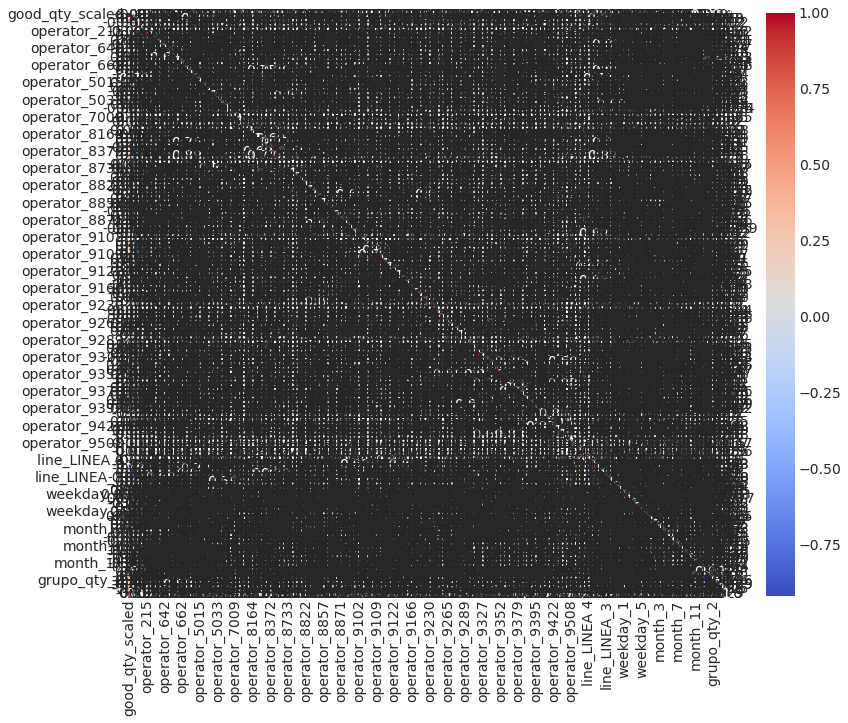

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = X_encoded_scaled.corr()

# Generar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Mostrar el mapa de calor
plt.show()

In [307]:
import pandas as pd

# Calcular la matriz de correlación
correlation_matrix = X_encoded_scaled.corr()

# Establecer el umbral de correlación
umbral_correlacion = 0.9

# Encontrar las columnas altamente correlacionadas
columnas_correlacionadas = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > umbral_correlacion:
            columna = correlation_matrix.columns[i]
            columnas_correlacionadas.add(columna)

# Imprimir las columnas altamente correlacionadas
print("Columnas altamente correlacionadas:")
print(columnas_correlacionadas)

# Decidir qué columnas eliminar
columnas_eliminar = list(columnas_correlacionadas)

Columnas altamente correlacionadas:
{'operator_9352', 'grupo_qty_1', 'operator_9388'}


In [308]:
print(columnas_eliminar)

['operator_9352', 'grupo_qty_1', 'operator_9388']


In [309]:
# ... Puedes aplicar tu lógica para decidir qué columnas eliminar ...

# Eliminar las columnas del DataFrame original
X_encoded_scaled_filtrado = X_encoded_scaled.drop(columns=['grupo_qty_1'])

# Imprimir el DataFrame resultante
print("DataFrame después de eliminar columnas correlacionadas:")
X_encoded_scaled_filtrado

DataFrame después de eliminar columnas correlacionadas:


good_qty_scaled  theorical_time_scaled  operator_37  operator_50  \
0            0.000333               0.890890            0            0   
1            0.003668               0.198953            0            0   
2            0.015672               0.198953            0            0   
3            0.058686               0.066702            0            0   
4            0.089697               0.061780            0            0   
...               ...                    ...          ...          ...   
3976         0.089697               0.066702            0            0   
3977         0.179727               0.066702            0            0   
3978         0.049683               0.066702            0            0   
3979         0.021674               0.083770            0            0   
3980         0.043681               0.083770            0            0   

      operator_215  operator_287  operator_412  operator_504  operator_642  \
0                0             0             0             0             0   
1                0             1             0             1             0   
2                0             0             0             1             0   
3                0             0             0             0             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
3976             0             1             0             0             0   
3977             0             1             0             0             0   
3978             0             1             0             0             0   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_643  operator_654  operator_657  operator_662  operator_918  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             1   
...            ...           ...           ...           ...           ...   
3976             0             0             0             0             1   
3977             0             0             0             0             1   
3978             0             0             0             0             1   
3979             0             0             0             0             0   
3980             0             0             0             0             0   

      operator_1007  operator_5004  operator_5015  operator_5020  \
0                 0              0              0              0   
1                 1              0              0              0   
2                 0              0              0              0   
3                 1              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
3976              0              0              0              0   
3977              0              0              0              0   
3978              0              0              0              0   
3979              0              0              0              0   
3980              0              0              0              0   

      operator_5025  operator_5030  operator_5033  operator_5036  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ..

In [310]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled_filtrado, y_scaled, test_size=0.2, random_state=42)

In [311]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_scaled, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

result = X_test_scaled.copy()
result['prediction'] = y_pred

In [312]:
# Revertir el escalado y obtener los valores originales
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = pd.Series(y_pred.flatten())

y_test_scaled = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_test_scaled = pd.Series(y_test_scaled.flatten())

In [313]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)



print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.940762
Mean Absolute Error [MAE]: 121.08
Mean Squared Error [MSE]: 56245.16
Root Mean Squared Error [RMSE]: 237.16


Eliminando una de la variable mas correlacionado con otras no conseguimos tampoco un mejor resultado.

Vamos aplicar, con la casuistica de arriba que hemos sacado el mejor resultado

In [315]:
df_last_model = df_merged[~df_merged['line'].str.startswith('PREFILTRO')]

df_last_model


order   bomb_type     line  good_qty  bad_qty              start_date  \
0     5157110  01226-0890  LINEA_1       2.0      0.0 2020-01-27 12:04:52.480   
1     5158184    11509INT  LINEA 6      12.0      0.0 2020-01-18 11:48:44.873   
2     5158571    11509INT  LINEA 6      48.0      0.0 2020-02-03 11:29:08.710   
3     5159132       65566  LINEA_3     177.0      0.0 2020-01-02 05:51:04.857   
4     5159134       65567  LINEA_2     270.0      0.0 2020-01-02 12:28:00.403   
...       ...         ...      ...       ...      ...                     ...   
4100  5379835       65557  LINEA_2     270.0      0.0 2023-02-08 21:01:17.040   
4101  5379842       65562  LINEA_2     540.0      0.0 2023-02-09 13:00:06.627   
4102  5381228      65570H  LINEA_2     150.0      0.0 2023-02-08 12:50:17.953   
4103  5382059        6862  LINEA_7      66.0      0.0 2023-02-07 12:19:03.143   
4104  5382060        6863  LINEA_7     132.0      0.0 2023-02-03 05:51:37.500   

                    end_date  theorical_diff  theorical_time  \
0    2020-01-28 07:26:01.683           12623           85.58   
1    2020-01-18 12:46:26.833            3462           19.50   
2    2020-02-04 09:29:27.740           22323           19.50   
3    2020-01-03 13:06:19.940           55912            6.87   
4    2020-01-08 06:20:32.553           36783            6.40   
...                      ...             ...             ...   
4100 2023-02-09 12:58:46.290           30200            6.87   
4101 2023-02-10 16:23:59.713           71526            6.87   
4102 2023-02-08 19:17:01.463           23204            6.87   
4103 2023-02-08 13:41:29.470           34151            8.50   
4104 2023-02-07 11:48:25.750           79979            8.50   

      time_diff_seconds_calculated  time_diff_minutes_calculated  \
0                        12622.856                    210.380933   
1                         3461.960                     57.699333   
2                        22323.243                    372.054050   
3                        55912.126                    931.868767   
4                        36783.083                    613.051383   
...                            ...                           ...   
4100                     30199.907                    503.331783   
4101                     71526.036                   1192.100600   
4102                     23203.510                    386.725167   
4103                     34150.804                    569.180067   
4104                     79979.753                   1332.995883   

      total_operators_minutes  registers_qty  operators_distinct_qty  \
0                  210.380933              8                       1   
1                  230.797333              2                       4   
2                 1114.680950              7                       3   
3                 1756.166533             20                       2   
4                 2446.176833             25                       4   
...                       ...            ...                     ...   
4100              1941.383633             23                       7   
4101              3994.120200             54                       7   
4102              1102.333133             18                       7   
4103               569.180067              5                       1   
4104              1332.995883              8                       1   

      theorical_qty  performance  time_diff_hours_calculated  \
0          2.458296     0.813572                    3.506349   
1         11.835761     1.013877                    0.961656   
2         57.163126     0.839702                    6.200901   
3        255.628316     0.692412                   15.531146   
4        382.215130     0.706408                   10.217523   
...             ...          ...                         ...   
4100     282.588593     0.955453                    8.388863   
4101     581.385764     0.928815                   19.868343   
4102    

## LAST MODEL - WITH OPTIMIZER HYPERPARAMETERS OPTUNA (3000 ITERATIONS)

In [403]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ruta completa del archivo CSV
ruta_archivo = 'data/processed_csv/df_model_final.csv'

# Leer el archivo CSV en un DataFrame
df_model_final = pd.read_csv(ruta_archivo)

# Crear una instancia del MinMaxScaler y aplicar el escalado
scaler = MinMaxScaler()

df = df_model_final.copy()

TARGET = 'total_operators_minutes'
exclude_columns = ['order', 'bomb_type', 'bad_qty', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'performance',
                   'time_diff_hours_calculated', 'achieve_performance', 'performance_category', 'registers_qty', 'operators_distinct_qty', 'turn', 'year'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

# Convertimos las variable dummys en columnas con 0 o 1
X_encoded = pd.get_dummies(X)

# Realizar el escalado de las columnas 'good_qty' y 'theorical_time'
df_scaled = pd.DataFrame(scaler.fit_transform(X_encoded[['good_qty', 'theorical_time']]), columns=['good_qty_scaled', 'theorical_time_scaled'])
# Combinar el dataframe original con las columnas escaladas
X_encoded_scaled = pd.concat([df_scaled, X_encoded], axis=1)
# Eliminar las columnas 'good_qty' y 'theorical_time' del dataframe
X_encoded_scaled = X_encoded_scaled.drop(columns=['good_qty', 'theorical_time'])

# Realizar el escalado de las columnas 'y'
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Definir los límites de los grupos
grupo_1_limite = 0.2
grupo_2_limite = 0.4
grupo_3_limite = 0.6
grupo_4_limite = 0.8

# Crear la columna de grupos basada en 'good_qty_scaled'
X_encoded_scaled['grupo_qty'] = pd.cut(X_encoded_scaled['good_qty_scaled'], bins=[-float('inf'), grupo_1_limite, grupo_2_limite, grupo_3_limite, grupo_4_limite, float('inf')], labels=False, right=False)
# Aplicar el one-hot encoding a la columna de grupos
X_encoded_scaled = pd.get_dummies(X_encoded_scaled, columns=['grupo_qty','weekday','month'])

# Crear la nueva columna 'Multitime_ofplicacion' como el resultado de la multiplicación de 'good_qty_scaled' y 'theorical_time_scaled'
X_encoded_scaled['time_of'] = X_encoded_scaled['good_qty_scaled'] * X_encoded_scaled['theorical_time_scaled']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

In [331]:
'''
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Definir la función objetivo para la optimización de Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 6, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 3),
        'gamma': trial.suggest_float('gamma', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.9, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.4, 0.6),
        'random_state': 42
    }

    # Crear el modelo XGBRegressor con los hiperparámetros propuestos
    model = xgb.XGBRegressor(**params)

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train_scaled)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)

    # Invertir la transformación sobre y_pred
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_pred = pd.Series(y_pred.flatten())

    # Invertir la transformación sobre y_test_scaled
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
    y_test = pd.Series(y_test.flatten())

    # Calcular el error MSE
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Crear el estudio de Optuna y ejecutar la optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=3000)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params
'''

[I 2023-05-20 14:15:45,464] A new study created in memory with name: no-name-02396f50-6001-420d-a336-7b17607c361b
[I 2023-05-20 14:15:59,045] Trial 0 finished with value: 69751.07304605088 and parameters: {'max_depth': 6, 'learning_rate': 0.5518341103653844, 'n_estimators': 888, 'min_child_weight': 1, 'gamma': 0.046012306800823334, 'subsample': 0.834476129555672, 'colsample_bytree': 0.9388468652396181, 'reg_alpha': 0.7181630149170166, 'reg_lambda': 0.49537248457722816}. Best is trial 0 with value: 69751.07304605088.
[I 2023-05-20 14:16:10,646] Trial 1 finished with value: 79504.5017698142 and parameters: {'max_depth': 9, 'learning_rate': 0.8065752016515016, 'n_estimators': 728, 'min_child_weight': 3, 'gamma': 0.08014335536050986, 'subsample': 0.8938339478591402, 'colsample_bytree': 0.9953005929619994, 'reg_alpha': 0.6406755136934188, 'reg_lambda': 0.517178991035802}. Best is trial 0 with value: 69751.07304605088.
[I 2023-05-20 14:16:21,413] Trial 2 finished with value: 81661.1221925007

In [332]:
'''
# Imprimir los mejores parámetros
print("Mejores hiperparámetros encontrados:")
for key, value in best_params.items():
    print(f"- {key}: {value}")
'''

Mejores hiperparámetros encontrados:
- max_depth: 10
- learning_rate: 0.28073606297204146
- n_estimators: 800
- min_child_weight: 3
- gamma: 0.010005371006274282
- subsample: 0.8585833713679496
- colsample_bytree: 0.9760168186928367
- reg_alpha: 0.5462214645355881
- reg_lambda: 0.5889848097912264


Mejores hiperparámetros encontrados:
- max_depth: 10
- learning_rate: 0.28073606297204146
- n_estimators: 800
- min_child_weight: 3
- gamma: 0.010005371006274282
- subsample: 0.8585833713679496
- colsample_bytree: 0.9760168186928367
- reg_alpha: 0.5462214645355881
- reg_lambda: 0.5889848097912264

In [338]:
# Crear el clasificador XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_scaled, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

result = X_test_scaled.copy()
result['prediction'] = y_pred

# Revertir el escalado y obtener los valores originales
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = pd.Series(y_pred.flatten())

y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_test = pd.Series(y_test.flatten())

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.941644
Mean Absolute Error [MAE]: 120.79
Mean Squared Error [MSE]: 55407.70
Root Mean Squared Error [RMSE]: 235.39


In [339]:
# Crear el clasificador XGBoost con los mejores hiperparámetros
model = xgb.XGBRegressor(
    max_depth=10,
    learning_rate=0.28073606297204146,
    n_estimators=800,
    min_child_weight=3,
    gamma=0.010005371006274282,
    subsample=0.8585833713679496,
    colsample_bytree=0.9760168186928367,
    reg_alpha=0.5462214645355881,
    reg_lambda=0.5889848097912264,
    random_state=42
)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train_scaled, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

result = X_test_scaled.copy()
result['prediction'] = y_pred

# Revertir el escalado y obtener los valores originales
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = pd.Series(y_pred.flatten())

y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_test = pd.Series(y_test.flatten())

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared [R2]: %3f" % r2)
print("Mean Absolute Error [MAE]: %.2f" % mae)
print("Mean Squared Error [MSE]: %.2f" % mse)
print("Root Mean Squared Error [RMSE]: %.2f" % rmse)

R-squared [R2]: 0.936861
Mean Absolute Error [MAE]: 135.58
Mean Squared Error [MSE]: 59949.00
Root Mean Squared Error [RMSE]: 244.84


Los errores con el regressor son demasiados grandes.Vamos analizar la duración de las OFs, por ver que pasa si hacemos dos modelos separados por tiempo de las OFs.

### Separar modelos por tiempo

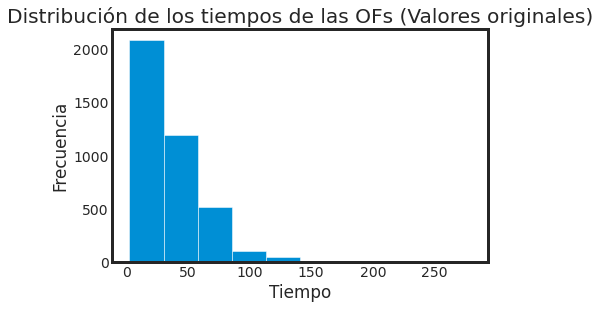

count    3981.000000
mean       34.832902
std        28.646408
min         2.721217
25%        13.050133
50%        28.434281
75%        53.154820
max       279.730872
Name: time_of_inverted, dtype: float64


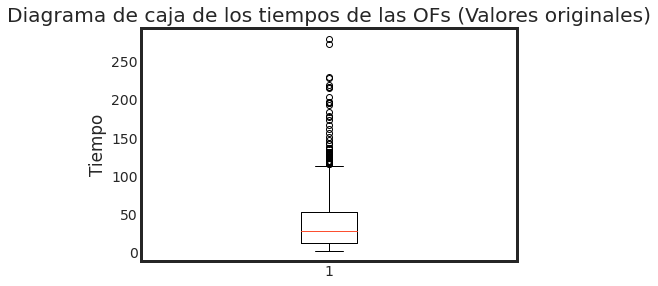

In [356]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataframe
data = X_encoded_scaled.copy()

# Invierte la escala de la columna "time_of"
data['time_of_inverted'] = scaler.inverse_transform(data[['time_of']])

# Visualización del histograma de los valores invertidos
plt.hist(data['time_of_inverted'], bins=10)
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Distribución de los tiempos de las OFs (Valores originales)')
plt.show()

# Estadísticas descriptivas de los valores invertidos
stats = data['time_of_inverted'].describe()
print(stats)

# Box plot de los valores invertidos
plt.boxplot(data['time_of_inverted'])
plt.ylabel('Tiempo')
plt.title('Diagrama de caja de los tiempos de las OFs (Valores originales)')
plt.show()



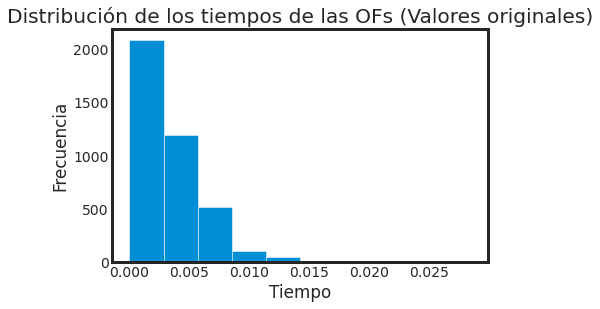

count    3981.000000
mean        0.003305
std         0.002949
min         0.000000
25%         0.001063
50%         0.002647
75%         0.005191
max         0.028513
Name: time_of, dtype: float64


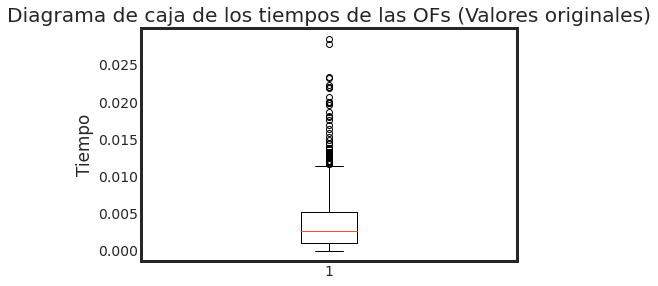

In [358]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataframe
data = X_encoded_scaled.copy()

# Visualización del histograma de los valores invertidos
plt.hist(data['time_of'], bins=10)
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Distribución de los tiempos de las OFs (Valores originales)')
plt.show()

# Estadísticas descriptivas de los valores invertidos
stats = data['time_of'].describe()
print(stats)

# Box plot de los valores invertidos
plt.boxplot(data['time_of'])
plt.ylabel('Tiempo')
plt.title('Diagrama de caja de los tiempos de las OFs (Valores originales)')
plt.show()

Posible mejora para este modelado, dividir el modelo en varios según el tiempo de duración de la OF

## CLASSIFIER MODEL

In [419]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ruta completa del archivo CSV
ruta_archivo = 'data/processed_csv/df_model_final.csv'

# Leer el archivo CSV en un DataFrame
df_model_final = pd.read_csv(ruta_archivo)

# Corte rendimiento aceptable
performance_cutoff = 0.80

# Crear una instancia del MinMaxScaler y aplicar el escalado
scaler = MinMaxScaler()

df_model_final['achieve_performance'] = df_model_final['performance'].apply(lambda x: 1 if x >= performance_cutoff else 0)

df = df_model_final.copy()

TARGET = 'achieve_performance'
exclude_columns = ['order', 'bomb_type', 'bad_qty', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'performance',
                   'time_diff_hours_calculated', 'performance_category', 'registers_qty', 'operators_distinct_qty', 'turn', 'year', 'total_operators_minutes'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

# Convertimos las variable dummys en columnas con 0 o 1
X_encoded = pd.get_dummies(X)

# Realizar el escalado de las columnas 'good_qty' y 'theorical_time'
df_scaled = pd.DataFrame(scaler.fit_transform(X_encoded[['good_qty', 'theorical_time']]), columns=['good_qty_scaled', 'theorical_time_scaled'])
# Combinar el dataframe original con las columnas escaladas
X_encoded_scaled = pd.concat([df_scaled, X_encoded], axis=1)
# Eliminar las columnas 'good_qty' y 'theorical_time' del dataframe
X_encoded_scaled = X_encoded_scaled.drop(columns=['good_qty', 'theorical_time'])

# Realizar el escalado de las columnas 'y'
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Definir los límites de los grupos
grupo_1_limite = 0.2
grupo_2_limite = 0.4
grupo_3_limite = 0.6
grupo_4_limite = 0.8

# Crear la columna de grupos basada en 'good_qty_scaled'
X_encoded_scaled['grupo_qty'] = pd.cut(X_encoded_scaled['good_qty_scaled'], bins=[-float('inf'), grupo_1_limite, grupo_2_limite, grupo_3_limite, grupo_4_limite, float('inf')], labels=False, right=False)
# Aplicar el one-hot encoding a la columna de grupos
X_encoded_scaled = pd.get_dummies(X_encoded_scaled, columns=['grupo_qty','weekday','month'])

# Crear la nueva columna 'Multitime_ofplicacion' como el resultado de la multiplicación de 'good_qty_scaled' y 'theorical_time_scaled'
X_encoded_scaled['time_of'] = X_encoded_scaled['good_qty_scaled'] * X_encoded_scaled['theorical_time_scaled']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

In [422]:
# Crear el clasificador XGBoost
model = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_scaled, verbose=True)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

result = X_test_scaled.copy()
result['prediction'] = y_pred
result['prediction_prob'] = y_pred_proba

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_scaled, y_pred)
print("Precisión del modelo: %.2f%%" % (accuracy * 100.0))

/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pau-mila/miniconda3/envs/uic/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

[13:34:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precisión del modelo: 74.65%


In [423]:
df_result_complete = pd.concat([result, df_model_final[df_model_final.index.isin(result.index)].loc[:, ~df_model_final.columns.isin(result.columns)]], axis=1)
df_result_complete.head()

good_qty_scaled  theorical_time_scaled  operator_37  operator_50  \
6          0.000333               0.884817            0            0   
8          0.029677               0.220314            0            0   
12         0.002334               0.738220            0            0   
14         0.009670               0.099058            0            0   
17         0.079693               0.066702            0            0   

    operator_215  operator_287  operator_412  operator_504  operator_642  \
6              0             0             0             0             0   
8              0             1             0             0             0   
12             0             0             0             0             0   
14             0             1             0             0             0   
17             0             1             0             0             0   

    operator_643  operator_654  operator_657  operator_662  operator_918  \
6              0             0             0             0             0   
8              0             0             0             0             0   
12             0             0             0             0             0   
14             0             0             0             0             1   
17             0             0             0             0             1   

    operator_1007  operator_5004  operator_5015  operator_5020  operator_5025  \
6               0              0              0              0              1   
8               0              0              0              0              0   
12              1              0              0              0              0   
14              0              0              0              0              0   
17              0              0              0              0              0   

    operator_5030  operator_5033  operator_5036  operator_5069  operator_5096  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              1              0              0              0   
14              0              0              0              0              0   
17              0              0              0              0              0   

    operator_7009  operator_7028  operator_8007  operator_8093  operator_8164  \
6               0              0              0              0              0   
8               0              1              0              0              0   
12              0              0              0              0              0   
14              0              0              0              0              0   
17              0              0              0              1              1   

    operator_8177  operator_8230  operator_8250  operator_8372  operator_8615  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              1              0              0              0              1   
17              1              1              0              1              1   

    operator_8676  operator_8721  operator_8733  operator_8752  operator_8820  \
6               0              0              0              0              0   
8               0              0              0              0              0   
12              0              0              0              0              0   
14              0              0              0              0              0   
17              0              0              0              0              0   

    operator_8821  operator_8822  operator_8824  operator_8830  operator_8833  \
6               0              0              0              0              0   
8               0              0              0             

In [424]:
y_true = df_result_complete['achieve_performance']
y_pred = df_result_complete['prediction']

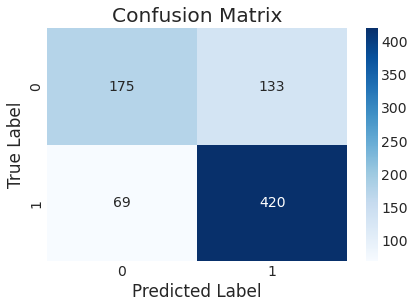

In [425]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Vamos a intentar tal y como tenemos actualmente el classificador si por algun optimizador podemos mejorar el modelo clasificador.

### MODEL CLASSIFIER - OPTIMIZATION HYPERPARAMS WITH OPTUNA

In [426]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ruta completa del archivo CSV
ruta_archivo = 'data/processed_csv/df_model_final.csv'

# Leer el archivo CSV en un DataFrame
df_model_final = pd.read_csv(ruta_archivo)

# Corte rendimiento aceptable
performance_cutoff = 0.80

# Crear una instancia del MinMaxScaler y aplicar el escalado
scaler = MinMaxScaler()

df_model_final['achieve_performance'] = df_model_final['performance'].apply(lambda x: 1 if x >= performance_cutoff else 0)

df = df_model_final.copy()

TARGET = 'achieve_performance'
exclude_columns = ['order', 'bomb_type', 'bad_qty', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'performance',
                   'time_diff_hours_calculated', 'performance_category', 'registers_qty', 'operators_distinct_qty', 'turn', 'year', 'total_operators_minutes'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

# Convertimos las variable dummys en columnas con 0 o 1
X_encoded = pd.get_dummies(X)

# Realizar el escalado de las columnas 'good_qty' y 'theorical_time'
df_scaled = pd.DataFrame(scaler.fit_transform(X_encoded[['good_qty', 'theorical_time']]), columns=['good_qty_scaled', 'theorical_time_scaled'])
# Combinar el dataframe original con las columnas escaladas
X_encoded_scaled = pd.concat([df_scaled, X_encoded], axis=1)
# Eliminar las columnas 'good_qty' y 'theorical_time' del dataframe
X_encoded_scaled = X_encoded_scaled.drop(columns=['good_qty', 'theorical_time'])

# Realizar el escalado de las columnas 'y'
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Definir los límites de los grupos
grupo_1_limite = 0.2
grupo_2_limite = 0.4
grupo_3_limite = 0.6
grupo_4_limite = 0.8

# Crear la columna de grupos basada en 'good_qty_scaled'
X_encoded_scaled['grupo_qty'] = pd.cut(X_encoded_scaled['good_qty_scaled'], bins=[-float('inf'), grupo_1_limite, grupo_2_limite, grupo_3_limite, grupo_4_limite, float('inf')], labels=False, right=False)
# Aplicar el one-hot encoding a la columna de grupos
X_encoded_scaled = pd.get_dummies(X_encoded_scaled, columns=['grupo_qty','weekday','month'])

# Crear la nueva columna 'Multitime_ofplicacion' como el resultado de la multiplicación de 'good_qty_scaled' y 'theorical_time_scaled'
X_encoded_scaled['time_of'] = X_encoded_scaled['good_qty_scaled'] * X_encoded_scaled['theorical_time_scaled']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

Entrenando el modelo con todo el historico y un 80% de train y un 20% de test. He llegado a obtener un 82,43%.

Mejores hiperparámetros encontrados:
- max_depth: 3
- learning_rate: 0.3620591464749646
- n_estimators: 165
- min_child_weight: 5
- gamma: 0.18153092054929534
- subsample: 0.9605251319511919
- colsample_bytree: 0.1727481447514529
- reg_alpha: 0.6312990421100635
- reg_lambda: 0.21685117069036625

Vamos a separara los datos.Vamos a entrenar con todo el historico menos los datos del 2023 para guardarlos para hacer pruebas de validación y comprobar si tenemos un buen resultado

In [480]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ruta completa del archivo CSV
ruta_archivo = 'data/processed_csv/df_model_final.csv'

# Leer el archivo CSV en un DataFrame
df_model_final = pd.read_csv(ruta_archivo)

# Corte rendimiento aceptable
performance_cutoff = 0.80

# Crear una instancia del MinMaxScaler y aplicar el escalado
scaler = MinMaxScaler()

df_model_final['achieve_performance'] = df_model_final['performance'].apply(lambda x: 1 if x >= performance_cutoff else 0)

# Obtener DataFrame de 2023 y DataFrame sin datos de 2023
df_model_final_2023 = df_model_final[df_model_final['year'] == 2023].copy()
df_model_final_2023.reset_index(inplace=True, drop=True)
df_model_final_not_2023 = df_model_final[df_model_final['year'] != 2023].copy()
df_model_final_not_2023.reset_index(inplace=True, drop=True)

df = df_model_final_not_2023.copy()

TARGET = 'achieve_performance'
exclude_columns = ['order', 'bomb_type', 'bad_qty', 'start_date', 'end_date', 'theorical_qty', 'theorical_diff',
                   'time_diff_seconds_calculated', 'time_diff_minutes_calculated', 'performance',
                   'time_diff_hours_calculated', 'performance_category', 'registers_qty', 'operators_distinct_qty', 'turn', 'year', 'total_operators_minutes'] + [TARGET]
FEATURES = [col for col in df.columns if col not in exclude_columns]

# Dividir los datos en características (features) y variable objetivo (target)
X = df[FEATURES]
y = df[TARGET]

# Convertimos las variable dummys en columnas con 0 o 1
X_encoded = pd.get_dummies(X)

# Realizar el escalado de las columnas 'good_qty' y 'theorical_time'
df_scaled = pd.DataFrame(scaler.fit_transform(X_encoded[['good_qty', 'theorical_time']]), columns=['good_qty_scaled', 'theorical_time_scaled'])
# Combinar el dataframe original con las columnas escaladas
X_encoded_scaled = pd.concat([df_scaled, X_encoded], axis=1)
# Eliminar las columnas 'good_qty' y 'theorical_time' del dataframe
X_encoded_scaled = X_encoded_scaled.drop(columns=['good_qty', 'theorical_time'])

# Realizar el escalado de las columnas 'y'
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Definir los límites de los grupos
grupo_1_limite = 0.2
grupo_2_limite = 0.4
grupo_3_limite = 0.6
grupo_4_limite = 0.8

# Crear la columna de grupos basada en 'good_qty_scaled'
X_encoded_scaled['grupo_qty'] = pd.cut(X_encoded_scaled['good_qty_scaled'], bins=[-float('inf'), grupo_1_limite, grupo_2_limite, grupo_3_limite, grupo_4_limite, float('inf')], labels=False, right=False)
# Aplicar el one-hot encoding a la columna de grupos
X_encoded_scaled = pd.get_dummies(X_encoded_scaled, columns=['grupo_qty','weekday','month'])

# Crear la nueva columna 'Multitime_ofplicacion' como el resultado de la multiplicación de 'good_qty_scaled' y 'theorical_time_scaled'
X_encoded_scaled['time_of'] = X_encoded_scaled['good_qty_scaled'] * X_encoded_scaled['theorical_time_scaled']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_encoded_scaled, y_scaled, test_size=0.2, random_state=42)

In [483]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Definir la función objetivo para la optimización de Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'seed': 42,
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    model = xgb.XGBClassifier(**params)
    model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate predictions
    accuracy = accuracy_score(y_test_scaled, y_pred)
    return accuracy

# Crear el estudio de Optuna y ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10000)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params

[I 2023-05-21 16:53:52,638] A new study created in memory with name: no-name-8f0c0bd3-8bb0-43e8-bb6f-38a701d85502
[I 2023-05-21 16:53:55,914] Trial 0 finished with value: 0.7759067357512953 and parameters: {'max_depth': 7, 'learning_rate': 0.5030759087860117, 'n_estimators': 233, 'min_child_weight': 2, 'gamma': 0.036629221392164894, 'subsample': 0.19791701874819403, 'colsample_bytree': 0.6312496386581072, 'reg_alpha': 0.3763575624598016, 'reg_lambda': 0.5048137913960642}. Best is trial 0 with value: 0.7759067357512953.
[I 2023-05-21 16:53:59,177] Trial 1 finished with value: 0.7927461139896373 and parameters: {'max_depth': 4, 'learning_rate': 0.5025867502510626, 'n_estimators': 375, 'min_child_weight': 3, 'gamma': 0.12300178939722839, 'subsample': 0.5004458440511004, 'colsample_bytree': 0.072901645313682, 'reg_alpha': 0.1391992843251493, 'reg_lambda': 0.19178299833465332}. Best is trial 1 with value: 0.7927461139896373.
[I 2023-05-21 16:54:04,157] Trial 2 finished with value: 0.7383419